# Project Name - Netflix movies and tv shows clustering

#### Project Type -  Unsupervised ML
#### Name        -  Tripti Singh

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Importing Necessary Packages**

In [ ]:
!pip install xplotter --upgrade
!pip install pycountry-convert
!pip install geopy
!pip install folium
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 297 kB 48.7 MB/s 
     |████████████████████████████████| 208 kB 47.8 MB/s 
     |████████████████████████████████| 297 kB 13.7 MB/s 
     |████████████████████████████████| 297 kB 47.2 MB/s 
     |████████████████████████████████| 296 kB 48.7 MB/s 
     |████████████████████████████████| 296 kB 50.1 MB/s 
     |████████████████████████████████| 280 kB 52.1 MB/s 
     |████████████████████████████████| 280 kB 47.3 MB/s 
     |████████████████████████████████| 280 kB 50.1 MB/s 
     |████████████████████████████████| 280 kB 52.4 MB/s 
     |████████████████████████████████

In [ ]:
import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm



%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


# Xplotter
from xplotter.insights import *
from xplotter.formatter import format_spines

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nf=pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')

In [ ]:
nf.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
nf.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

We can see that there are NaN values in some columns.

# **Checking shape of the dataset and column names**

In [ ]:
nf.shape

(7787, 12)

In [ ]:
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

For better understanding the column name "listed_in" has changed to "genres".

In [ ]:
nf.rename(columns = {"listed_in":"genres"},inplace = True)
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

# **Checking Duplicate Records**

In [ ]:
#Drop duplicates if any
nf=nf.drop_duplicates()

In [ ]:
nf.shape

(7787, 12)

No duplicate records found.

# **3. Data Preparation and Cleaning**

In [ ]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 790.9+ KB


There are 7787 rows and 12 columns.  There are few columns that have null values, such as director,cast,country,date_added,rating.


In [ ]:
# checking the number of unique values
nf.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
genres           492
description     7769
dtype: int64

All  show IDs and titles are unique whereas others might have been repeated.

# **Analyzing  statistics of the dataset**

In [ ]:
nf.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

# **Conclusion**




Netflix has 25% of movies and TV shows released in 2013

About 75% of Netflix's content consists of movies and TV shows released after 2013

Data from Netflix shows that new trend movies or TV shows are more prevalent.

For more subscribers, Netflix should invest in classic Movies and TV shows.

# **Handling Null Values From the Dataset**

We can see for each of the columns, there are different unique values for some of them. It makes sense that show_id is large since it is a unique key used to identify a movie or a show. Title, director, cast, country, date_added, listed_in, and description contain many unique values.

In [ ]:
nf.isnull().values.any()

True

In [ ]:
nf.isnull().sum().sum()

3631

In [ ]:
nf.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

We can see there are lot of  null values in the dataset. There are a total of 3,631 null values across the entire dataset with 2,389 missing points under 'director', 718 under 'cast', 507 under 'country', 10 under 'date_added', and 7 under 'rating'.

In [ ]:
for i in nf.columns:
  null_rate = nf[i].isnull().sum()/len(nf)*100
  if null_rate > 0 :
        print( "{}'s null rate: {}%".format(i, round(null_rate, 3)))

director's null rate: 30.679%
cast's null rate: 9.22%
country's null rate: 6.511%
date_added's null rate: 0.128%
rating's null rate: 0.09%


 We can see the 'director' column has the highest whereas 'rating' column has the lowest number of missing values.

In [ ]:
nf['director'].fillna('No Director', inplace=True)
nf['cast'].fillna('No Cast', inplace=True)
nf['country'].fillna('Country Unavailable', inplace=True)
nf.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
nf.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
genres          False
description     False
dtype: bool

Since 'director', 'cast', and 'country' contain the majority of null values, we will  treat each missing value as unavailable. The other two labels 'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset. Now, we can see that there are no more null values in the dataset.

# **Creating Separate Datasets for Movies and TV Shows**

In [ ]:
nf_movies = nf[nf['type']=='Movie'].copy()
nf_movies.head()

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   
4      s5  Movie     21     Robert Luketic   
6      s7  Movie    122    Yasir Al Yasiri   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   

          date_added  release_year rating duration  \
1  December 23, 2016          2016  TV-MA   93 min   
2  December 20, 2018          2011      R   78 min   
3  November 16, 2017          2009  PG-13   80 min   
4    January 1, 2020          2008  PG-13  123 min   
6       June 1, 2020          2019  TV-MA   95 min   

                                              genres  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
6                Horror Movies, International Movies   

                                         description  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  
6  After an awful accident, a couple admitted to ...

In [ ]:
nf_shows = nf[nf['type']=='TV Show'].copy()
nf_shows.head()

show_id     type   title              director  \
0       s1  TV Show      3%           No Director   
5       s6  TV Show      46           Serdar Akar   
11     s12  TV Show    1983           No Director   
12     s13  TV Show    1994  Diego Enrique Osorno   
16     s17  TV Show  Feb-09           No Director   

                                                 cast                country  \
0   João Miguel, Bianca Comparato, Michel Gomes, R...                 Brazil   
5   Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...                 Turkey   
11  Robert Więckiewicz, Maciej Musiał, Michalina O...  Poland, United States   
12                                            No Cast                 Mexico   
16  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...    Country Unavailable   

           date_added  release_year rating   duration  \
0     August 14, 2020          2020  TV-MA  4 Seasons   
5        July 1, 2017          2016  TV-MA   1 Season   
11  November 30, 2018          2018  TV-MA   1 Season   
12       May 17, 2019          2019  TV-MA   1 Season   
16     March 20, 2019          2018  TV-14   1 Season   

                                               genres  \
0   International TV Shows, TV Dramas, TV Sci-Fi &...   
5     International TV Shows, TV Dramas, TV Mysteries   
11  Crime TV Shows, International TV Shows, TV Dramas   
12  Crime TV Shows, Docuseries, International TV S...   
16                  International TV Shows, TV Dramas   

                                          description  
0   In a future where the elite inhabit an island ...  
5   A genetics professor experiments with a treatm...  
11  In this dark alt-history thriller, a naïve law...  
12  Archival video and new interviews examine Mexi...  
16  As a psychology professor faces Alzheimer's, h...

Date Added: First, the date is in the following format: 25 September, 2021. This is a string which is not actionable. We need to take the string and convert it into a date format. The second thing is to seperate the year and place it in a different column which we will call "added_year". This will help  in next steps.

Rating: It appears like there is nothing wrong with 'rating'. But, to the viewer - ratings like 'TV-MA' or 'PG-13' means nothing. We just know that the rating means "for specific audiance". So, we want to conduct a research to understand all the ratings, and then change the text into a more readable, appropriate text

Listed In: simply put, 'genre'. However, we do notice something odd. Values like "International TV Show" or "International Movie" are not genres. These are types of content. So, let's split all the "International" to a different column, and remove them from "listed_in

In [ ]:
#adding columns of month and year of addition
nf['year_added'] = pd.DatetimeIndex(nf['date_added']).year
nf['month_added'] = pd.DatetimeIndex(nf['date_added']).month_name()
nf.head()

show_id     type  title           director  \
0      s1  TV Show     3%        No Director   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added month_added  
0  In a future where the elite inhabit an island ...        2020      August  
1  After a devastating earthquake hits Mexico Cit...        2016    December  
2  When an army recruit is found dead, his fellow...        2018    December  
3  In a postapocalyptic world, rag-doll robots hi...        2017    November  
4  A brilliant group of students become card-coun...        2020     January

Processing the 'rating' column'. Here we have 2 challenges, because not only we need to interpert what every rating means, we also need to change it to a more understandable text. Our course of action will be:

Listing all the unique ratings for movies and TV shows.

Check for similarities / differences between TV and movie ratings.

Interpert what every rating means.

Decide on new rating categories and change accordingly

In [ ]:
'''nf['rating'] = nf['rating'].replace({   'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'})'''

"nf['rating'] = nf['rating'].replace({   'TV-PG': 'Older Kids',\n    'TV-MA': 'Adults',\n    'TV-Y7-FV': 'Older Kids',\n    'TV-Y7': 'Older Kids',\n    'TV-14': 'Teens',\n    'R': 'Adults',\n    'TV-Y': 'Kids',\n    'NR': 'Adults',\n    'PG-13': 'Teens',\n    'TV-G': 'Kids',\n    'PG': 'Older Kids',\n    'G': 'Kids',\n    'UR': 'Adults',\n    'NC-17': 'Adults'})"

Now, let's deal with "International" types.

In [ ]:
nf['international'] = nf['genres'].apply(lambda x: "International" in x)

nf['genres'] = nf['genres'].apply(lambda x: x.split(", "))

nf[(nf['type'] == 'TV Show') & (nf['international'] == True)]['genres'].apply(lambda x: x.remove("International TV Shows"))

nf[(nf['type'] == 'Movie') & (nf['international'] == True)]['genres'].apply(lambda x: x.remove("International Movies"))

nf['genres'] = nf['genres'].apply(lambda x: ", ".join(x))

Next task is to replace all NaN values with "Not Available"

In [ ]:
nf = nf.fillna("Not Available")

# **Targets based on "rating"**

In [ ]:
print('TV Shows Ratings:',nf[nf['type'] == 'TV Show']['rating'].unique(),'\n')
print('Movies Ratings:',nf[nf['type'] == 'Movie']['rating'].unique())

TV Shows Ratings: ['TV-MA' 'TV-14' 'TV-PG' 'TV-Y7' 'TV-G' 'TV-Y' 'NR' 'R' 'TV-Y7-FV'] 

Movies Ratings: ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'PG' 'G' 'TV-Y7'
 'NC-17' 'TV-Y7-FV' 'UR']


We see here although all TV shows have a rating that starts with 'TV-' that makes them unique, some of the movie titles also have a rating that starts with 'TV-'. So its a mix.

After research, we decided to categorize the different ratings based on CONTENT (and not AGE). From our understanding, there are 6 content categories in which we want to divide the ratings by:

Kids

All Ages

Teens

Brief Violence/Nude

Adult Content

Unrated

# **Classifying the 'rating' feature into three categories. (Kids, Teenagers, Adults)**
TV-Y Kids

TV-Y7 Kids

TV-Y7-FV Kids

G Kids

TV-G Kids

PG Kids

TV-PG Kids

PG-13 Teenagers

TV-14 Teenagers

TV-MA Adults

R Adults

NC-17 Adults

NR Adults

UR Adults

In [ ]:
custom_rating = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

nf['ratings_cat'] = nf['rating'].replace(to_replace = custom_rating)
nf['ratings_cat'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

Conclusion- Using the target_ages column we can easily make out the intended audience for a particular

#  Fixing the datatype

In [ ]:
#type should be a category
nf['type'] = pd.Categorical(nf['type'])

# ratings_cat is another category (4 classes)
nf['ratings_cat'] = pd.Categorical(nf['ratings_cat'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year added should be integer so we can compare with `released_year`
nf['year_added'] = pd.to_numeric(nf['year_added'])

In [ ]:
rating_replacements = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA '
}

for id, rate in rating_replacements.items():
    nf.iloc[id, 8] = rate

nf['rating'].isnull().sum()

0

Conclusion: All the missing values in the ratings column have been fixed.

# **Handling Comma-Separated Values**
 We require all comma-separated values are placed in the correct order/form

In [ ]:
comma_columns = ['cast','director','country','genres']

for column in comma_columns:
    if len(nf[nf[column].str.startswith(",")]) > 0:
        print("In column:",column,"there are bad entries that BEGIN with a comma")
    if len(nf[nf[column].str.endswith(",")]) > 0:
        print("In column:",column,"there are bad entries that END with a comma")
    if len(nf[nf[column] == '']) > 0:
        print("In column:",column,"there are bad entries that CONTAIN empty values ''")

In column: country there are bad entries that END with a comma
In column: genres there are bad entries that CONTAIN empty values ''


There are bad entries so fixing them.

In [ ]:
nf[nf['country'].str.endswith(",")]

show_id   type          title               director  \
1402   s1403  Movie    City of Joy        Madeleine Gavin   
2315   s2316  Movie          Funan               Denis Do   
2827   s2828  Movie  Hotel Pacific        Janusz Majewski   
7433   s7434  Movie        Virunga  Orlando von Einsiedel   

                                                   cast  \
1402                                            No Cast   
2315  Bérénice Bejo, Louis Garrel, Colette Kieffer, ...   
2827  Marek Kondrat, Roman Wilhelmi, Roman Skamene, ...   
7433                                            No Cast   

                                     country         date_added  release_year  \
1402                          United States,  September 7, 2018          2018   
2315  France, Belgium, Luxembourg, Cambodia,      July 18, 2020          2018   
2827                                 Poland,    October 1, 2019          1975   
7433                         United Kingdom,   November 7, 2014          2014   

     rating duration                  genres  \
1402  TV-MA   77 min           Documentaries   
2315  TV-14   87 min                  Dramas   
2827  TV-MA   96 min  Classic Movies, Dramas   
7433  TV-MA  100 min           Documentaries   

                                            description  year_added  \
1402  Women who've been sexually brutalized in war-t...        2018   
2315  Separated from their young son during the brut...        2020   
2827  A motivated teen strives to rise from dishwash...        2019   
7433  The Oscar-nominated true story of the rangers ...        2014   

     month_added  international ratings_cat  
1402   September          False      Adults  
2315        July           True       Teens  
2827     October           True      Adults  
7433    November           True      Adults

In [ ]:
#correcting entries
nf.loc[1402,'country'] = 'United States'
nf.loc[2315,'country'] = 'France, Belgium, Luxembourg, Cambodia'
nf.loc[2827,'country'] = 'Poland'
nf.loc[7433,'country'] = 'United Kingdom'

Looking at empty values from genres

In [ ]:
nf[nf['genres']=='']

show_id     type                                              title  \
1707   s1708    Movie                              Derren Brown: Miracle   
1729   s1730  TV Show                      Devlok with Devdutt Pattanaik   
2035   s2036  TV Show                            Eurovision Song Contest   
3494   s3495    Movie                                    La Gran Ilusión   
4341   s4342    Movie  My Next Guest with David Letterman and Shah Ru...   

           director                                          cast  \
1707    No Director                                  Derren Brown   
1729    No Director               Rasika Dugal, Devdutt Pattanaik   
2035    No Director  Bar Refaeli, Erez Tal, Assi Azar, Lucy Ayoub   
3494   Antonio Díaz                                  Antonio Díaz   
4341  Michael Steed               Shah Rukh Khan, David Letterman   

                  country        date_added  release_year rating  duration  \
1707       United Kingdom     June 22, 2018          2018  TV-MA    74 min   
1729                India  October 15, 2018          2017  TV-PG  1 Season   
2035  Country Unavailable     July 23, 2019          2019  TV-PG  1 Season   
3494  Country Unavailable  October 28, 2020          2016  TV-14    50 min   
4341  Country Unavailable  October 25, 2019          2019  TV-PG    61 min   

     genres                                        description  year_added  \
1707         Illusionist Derren Brown reinvents the concept...        2018   
1729         Through chats with host Rasika Dugal, mytholog...        2018   
2035         Singers from all over Europe represent their c...        2019   
3494         Known as "El Mago Pop," illusionist Antonio Dí...        2020   
4341         "King of Bollywood" Shah Rukh Khan opens up ab...        2019   

     month_added  international ratings_cat  
1707        June           True      Adults  
1729     October           True  Older Kids  
2035        July           True  Older Kids  
3494     October           True       Teens  
4341     October           True  Older Kids

In [ ]:
#filling up entries by getting idea from description
nf.loc[1707,'genres'] = 'Sci-Fi & Fantasy'
nf.loc[1729,'genres'] = 'Stand-Up Comedy'
nf.loc[2035,'genres'] = 'Reality TV'
nf.loc[3494,'genres'] = 'Sci-Fi & Fantasy'
nf.loc[4341,'genres'] = 'Stand-Up Comedy & Talk Shows'

In [ ]:
nf.head()

show_id     type  title           director  \
0      s1  TV Show     3%        No Director   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                              genres  \
0                     TV Dramas, TV Sci-Fi & Fantasy   
1                                             Dramas   
2                                      Horror Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added month_added  \
0  In a future where the elite inhabit an island ...        2020      August   
1  After a devastating earthquake hits Mexico Cit...        2016    December   
2  When an army recruit is found dead, his fellow...        2018    December   
3  In a postapocalyptic world, rag-doll robots hi...        2017    November   
4  A brilliant group of students become card-coun...        2020     January   

   international ratings_cat  
0           True      Adults  
1           True      Adults  
2           True      Adults  
3          False       Teens  
4          False       Teens

In [ ]:
nf_movies = nf[nf['type']=='Movie'].copy()
nf_movies.duration = nf_movies.duration.str.replace(' min','').astype(int)
nf_movies.head()

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   
4      s5  Movie     21     Robert Luketic   
6      s7  Movie    122    Yasir Al Yasiri   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   

          date_added  release_year rating  duration  \
1  December 23, 2016          2016  TV-MA        93   
2  December 20, 2018          2011      R        78   
3  November 16, 2017          2009  PG-13        80   
4    January 1, 2020          2008  PG-13       123   
6       June 1, 2020          2019  TV-MA        95   

                                              genres  \
1                                             Dramas   
2                                      Horror Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
6                                      Horror Movies   

                                         description  year_added month_added  \
1  After a devastating earthquake hits Mexico Cit...        2016    December   
2  When an army recruit is found dead, his fellow...        2018    December   
3  In a postapocalyptic world, rag-doll robots hi...        2017    November   
4  A brilliant group of students become card-coun...        2020     January   
6  After an awful accident, a couple admitted to ...        2020        June   

   international ratings_cat  
1           True      Adults  
2           True      Adults  
3          False       Teens  
4          False       Teens  
6           True      Adults

In the duration column, there appears to be a discrepancy between movies and shows. Movies are based on the duration of the movie and shows are based on the number of seasons. We  will convert values in these columns into integers for both the movies and shows datasets.

In [ ]:
nf_shows = nf[nf['type']=='TV Show'].copy()
nf_shows.rename(columns={'duration':'seasons'}, inplace=True)
nf_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
nf_shows.seasons = nf_shows.seasons.str.replace(' Seasons','').astype(int)
nf_shows.head()

show_id     type   title              director  \
0       s1  TV Show      3%           No Director   
5       s6  TV Show      46           Serdar Akar   
11     s12  TV Show    1983           No Director   
12     s13  TV Show    1994  Diego Enrique Osorno   
16     s17  TV Show  Feb-09           No Director   

                                                 cast                country  \
0   João Miguel, Bianca Comparato, Michel Gomes, R...                 Brazil   
5   Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...                 Turkey   
11  Robert Więckiewicz, Maciej Musiał, Michalina O...  Poland, United States   
12                                            No Cast                 Mexico   
16  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...    Country Unavailable   

           date_added  release_year rating  seasons  \
0     August 14, 2020          2020  TV-MA        4   
5        July 1, 2017          2016  TV-MA        1   
11  November 30, 2018          2018  TV-MA        1   
12       May 17, 2019          2019  TV-MA        1   
16     March 20, 2019          2018  TV-14        1   

                            genres  \
0   TV Dramas, TV Sci-Fi & Fantasy   
5          TV Dramas, TV Mysteries   
11       Crime TV Shows, TV Dramas   
12      Crime TV Shows, Docuseries   
16                       TV Dramas   

                                          description  year_added month_added  \
0   In a future where the elite inhabit an island ...        2020      August   
5   A genetics professor experiments with a treatm...        2017        July   
11  In this dark alt-history thriller, a naïve law...        2018    November   
12  Archival video and new interviews examine Mexi...        2019         May   
16  As a psychology professor faces Alzheimer's, h...        2019       March   

    international ratings_cat  
0            True      Adults  
5            True      Adults  
11           True      Adults  
12           True      Adults  
16           True       Teens

# **4. Exploratory Data Analysis and Visualization**

# **4.1 TV Shows or Movies?**

# Distribution of Movies & TV shows

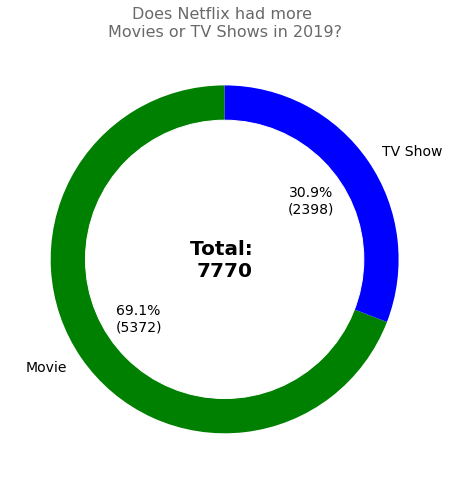

In [ ]:
# Balance of Netflix products
plot_donut_chart(df=nf, col='type', colors=['green', 'blue'], title='Does Netflix had more \nMovies or TV Shows in 2019?')

Conclusion-

Netflix has 69% of its content as movies

Movies are clearly more popular on Netflix than TV shows.

# **4.2 Ratings on Netflix**

In [ ]:
nf.rating

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7770, dtype: object

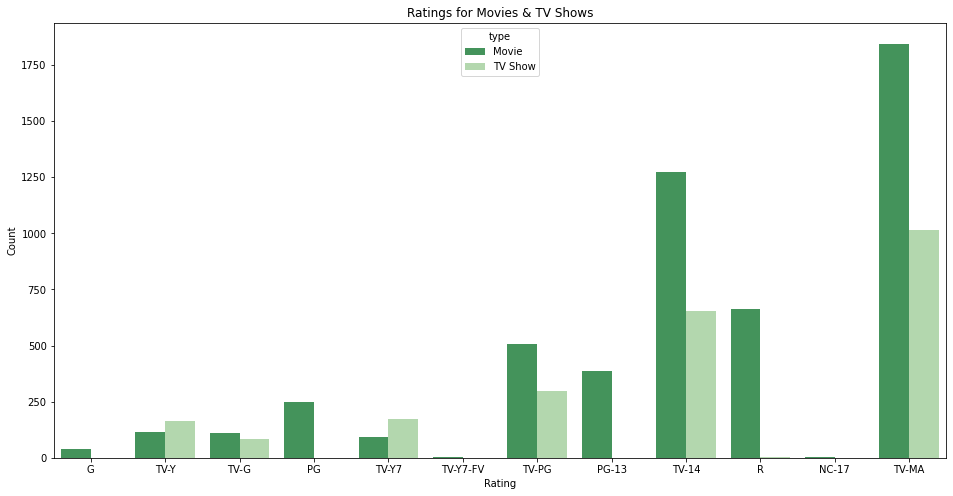

In [ ]:
order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(16,8))
g = sns.countplot(nf.rating, hue=nf.type, order=order, palette="Greens_r");
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

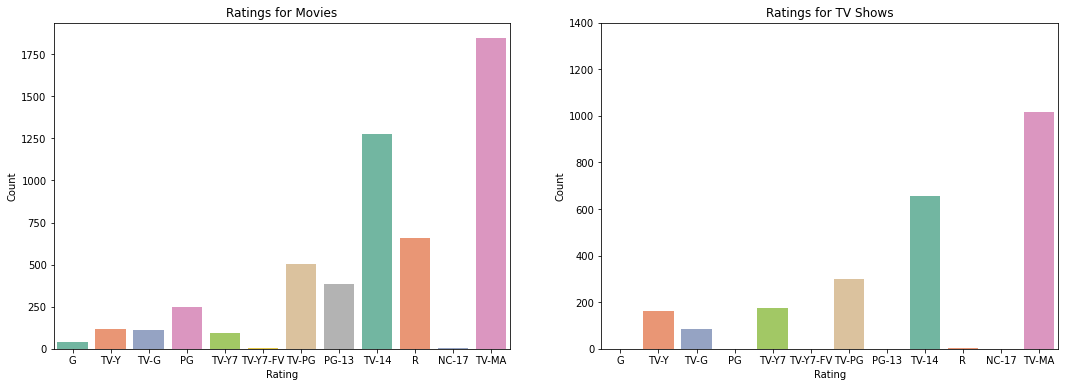

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(18, 6))
g1 = sns.countplot(nf_movies.rating, order=order,palette="Set2", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Count")
g2 = sns.countplot(nf_shows.rating, order=order,palette="Set2", ax=ax[1]);
g2.set(yticks=np.arange(0,1500,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Count")
fig.show()

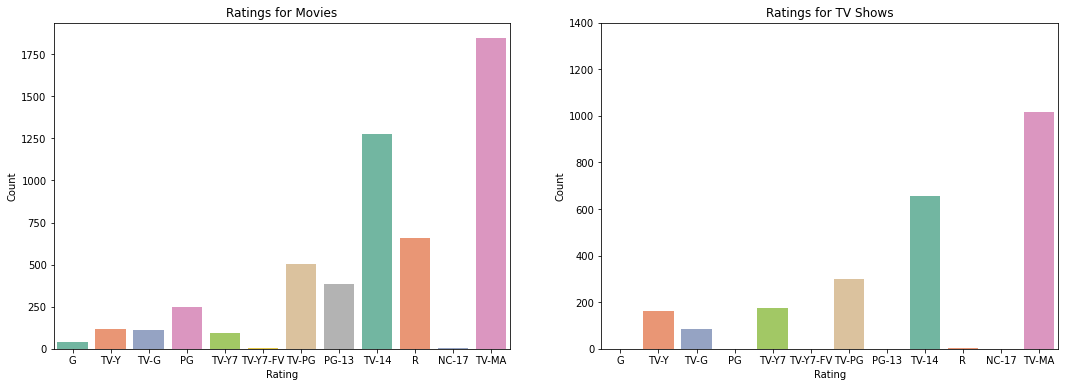

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(18, 6))
g1 = sns.countplot(nf_movies.rating, order=order,palette="Set2", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Count")
g2 = sns.countplot(nf_shows.rating, order=order,palette="Set2", ax=ax[1]);
g2.set(yticks=np.arange(0,1500,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Count")
fig.show()

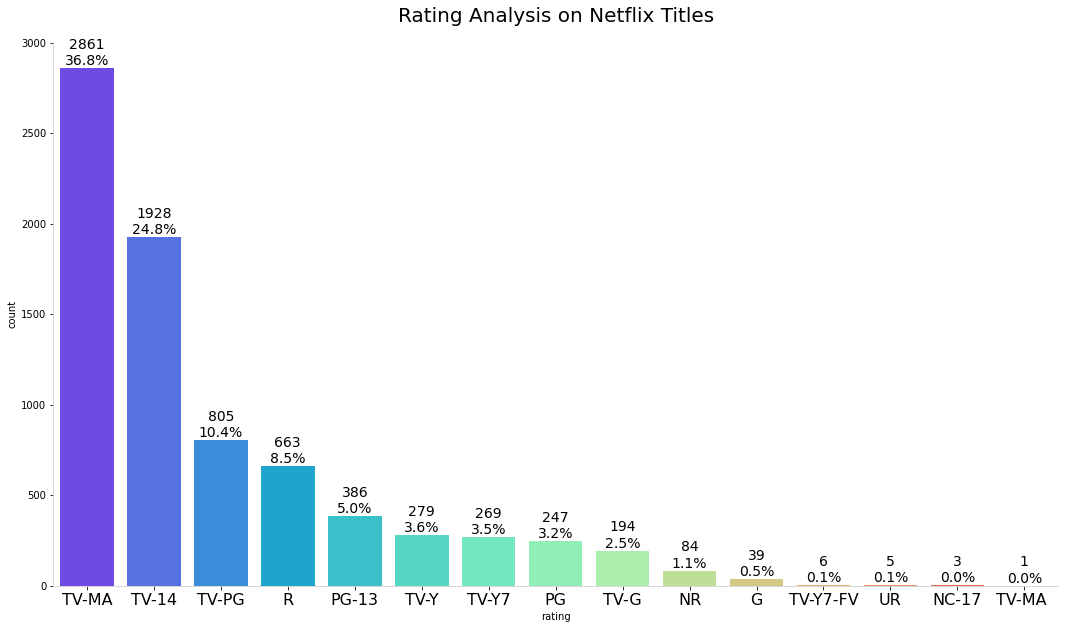

In [ ]:
# Plotting and customizing a rating analysis
plot_countplot(nf, 'rating', order=True, figsize=(18, 10),
               title='Rating Analysis on Netflix Titles', size_title=20)
plt.xticks(fontsize=16)
plt.show()

  Breaking the count analysis by title type.

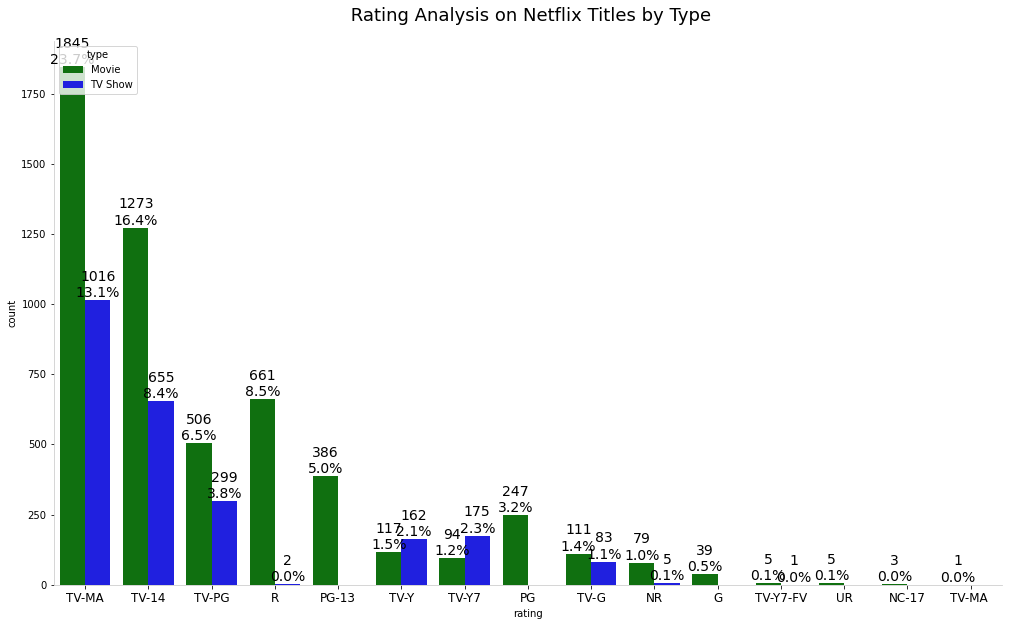

In [ ]:
# Plotting and customizing a rating analysis
plot_countplot(nf, 'rating', hue='type', order=True, figsize=(17, 10), palette=['green', 'blue'],
               title=' Rating Analysis on Netflix Titles by Type', size_title=18)
plt.xticks(fontsize=12)
plt.show()

For  mature audience, there is much more movie content than TV shows. However, for the younger audience (under the age of 17),there are more TV shows than movies.

# **4.3 Content added  yearly, monthly**

In [ ]:
nf['year_added'] = pd.DatetimeIndex(nf['date_added']).year
nf_movies['year_added'] = pd.DatetimeIndex(nf_movies['date_added']).year
nf_shows['year_added'] = pd.DatetimeIndex(nf_shows['date_added']).year
nf['month_added'] = pd.DatetimeIndex(nf['date_added']).month
nf_movies['month_added'] = pd.DatetimeIndex(nf_movies['date_added']).month
nf_shows['month_added'] = pd.DatetimeIndex(nf_shows['date_added']).month

Now we will take a look at the content Netflix has added throughout the previous years. Since we are interested in when Netflix added the title onto their platform, we will add a 'year_added' column  which shows the year of the date from the 'date_added' column as shown above.

In [ ]:
netflix_year = nf['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year

year  count
0   2019   2153
2   2018   1684
3   2017   1222
4   2016    440
5   2021    117
6   2015     88
7   2014     25
8   2011     13
9   2013     11
10  2012      3
11  2008      2
12  2009      2
13  2010      1

In [ ]:
netflix_year2 = nf[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2020]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2020]

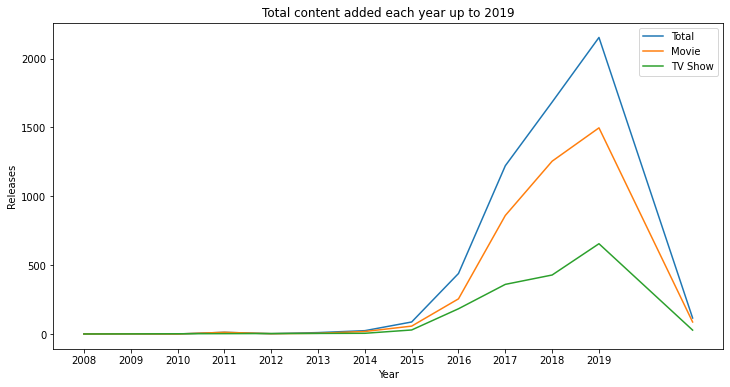

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year up to 2019")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

 We can see from above plot that since 2014 the amount of content added has been tremendous.

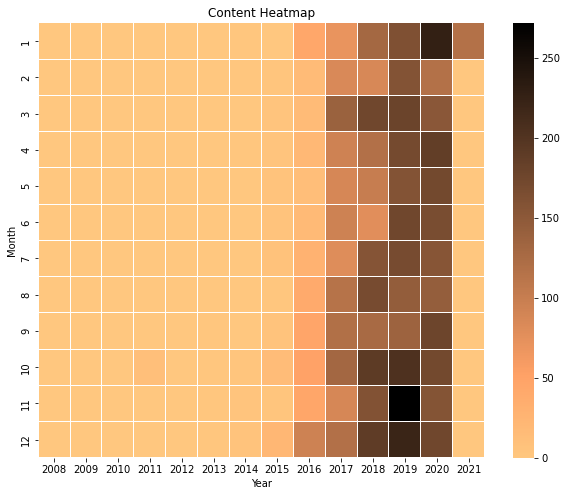

In [ ]:
month_year_df = nf.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(10,8))
sns.heatmap(month_year_df, linewidths=0.025, cmap="copper_r")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

# **Movies added to Netflix in  each year**

Text(0.5, 0, 'Year -> (Movies added to Netflix) ')

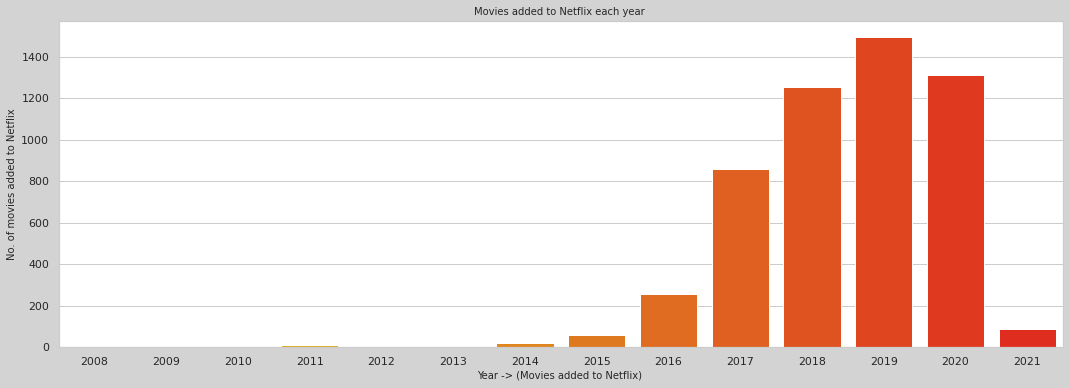

In [ ]:
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data = nf_movies,x = 'year_added',palette ="autumn_r")
plt.title('Movies added to Netflix each year ', fontsize=10)
plt.ylabel('No. of movies added to Netflix', fontsize=10)
plt.xlabel('Year -> (Movies added to Netflix) ', fontsize=10)

Conclusion-:

We can see from  graph that netflix has started adding content since 2014.

The popularity of OTT has boomed in the last 5 years.

Highest number of movies and tv shows added in the year 2019.

# **Number of TV shows added to netflix yearly.**

Text(0.5, 0, 'Year -> (Shows added to Netflix) ')

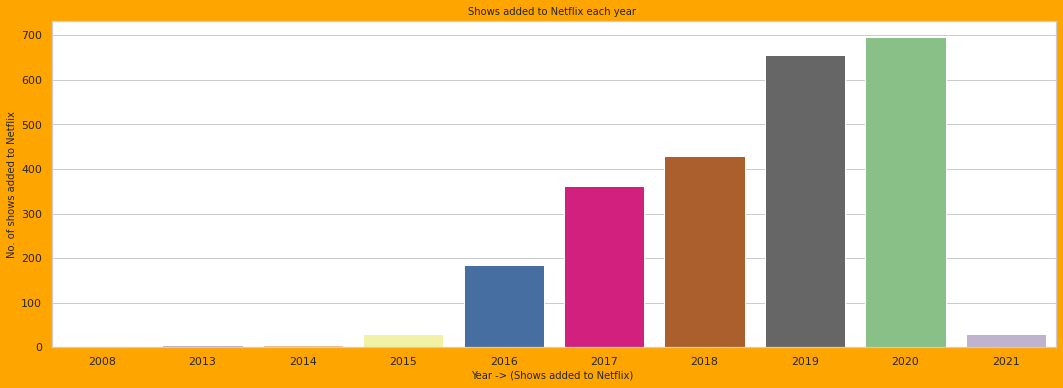

In [ ]:
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("orange")
sns.countplot(data = nf_shows,x = 'year_added',palette ="Accent")
plt.title('Shows added to Netflix each year ', fontsize=10)
plt.ylabel('No. of shows added to Netflix', fontsize=10)
plt.xlabel('Year -> (Shows added to Netflix) ', fontsize=10)

# **Checking  new content added monthly**

Text(0.5, 0, 'Month -> (Movies added to Netflix) ')

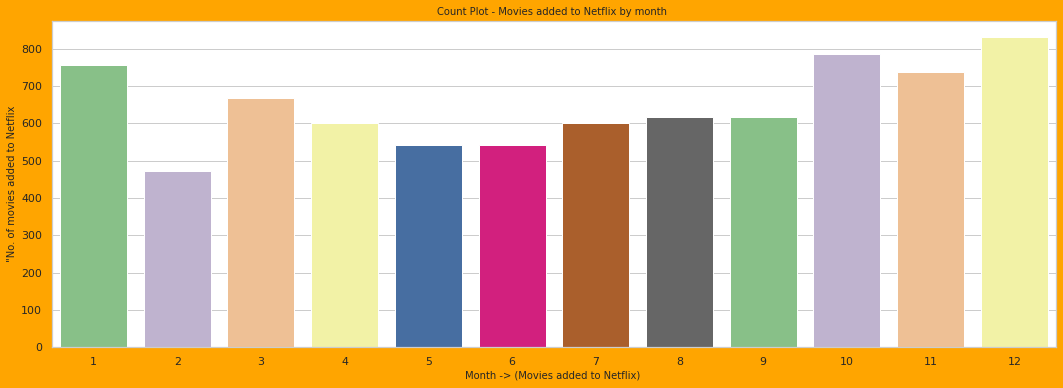

In [ ]:
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("orange")
sns.countplot(data=nf,x = 'month_added',palette ="Accent")
plt.title('Count Plot - Movies added to Netflix by month ', fontsize=10)
plt.ylabel('"No. of movies added to Netflix', fontsize=10)
plt.xlabel('Month -> (Movies added to Netflix) ', fontsize=10)

Conclusion-:

Each month, we  can see consistent content added.

# **4.4 Movies and TV Shows Duration**

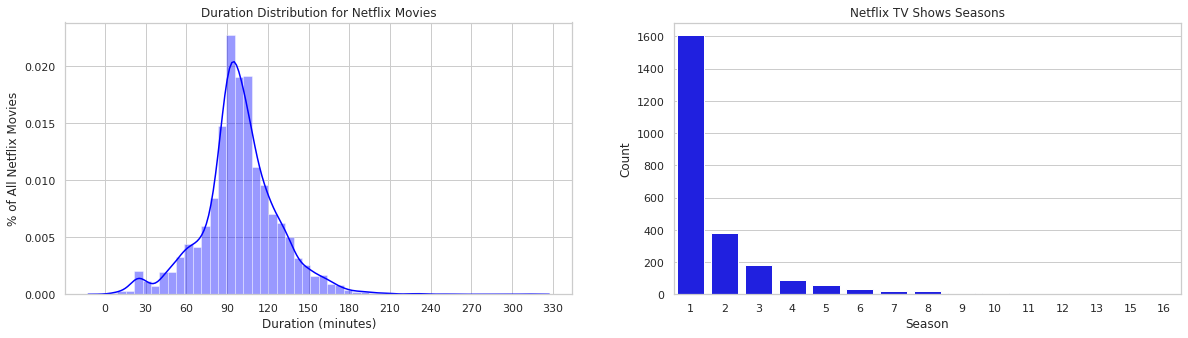

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
g1 = sns.distplot(nf_movies.duration, color='blue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(nf_shows.seasons, color='blue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season")
fig.show()

In the left graph, we can see that the duration for netflix movies closely resembles a normal distribution with the average duration 90 minutes. Netflix TV shows seems to be heavily skewed to the right where the majority of shows only have 1 season.









# **4.5 Countries with most content available**

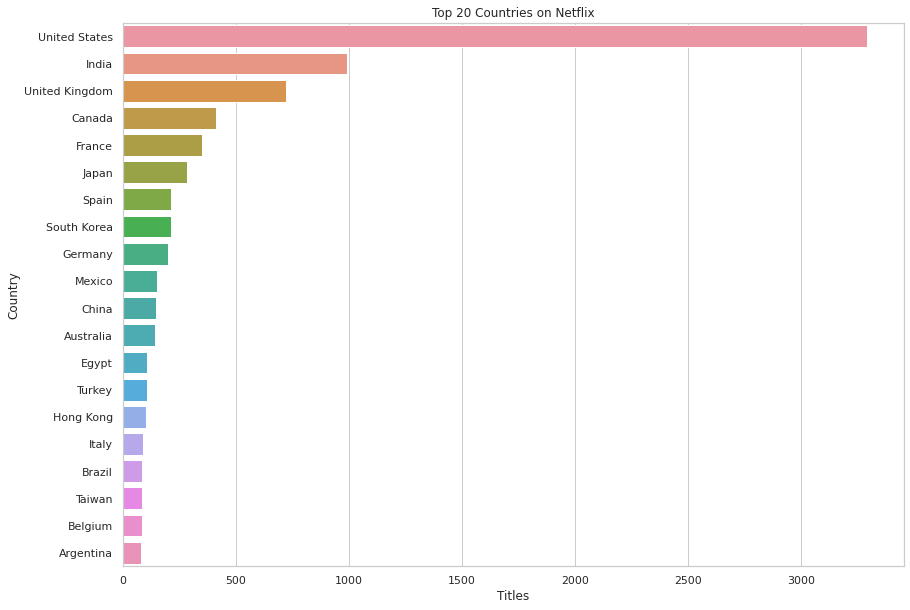

In [ ]:
filtered_countries = nf.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(14,10))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

The United States is on the top.India is at second followed by the UK and Canada. China interestingly is not even close to the top.

# **4.6 Popular Genres**

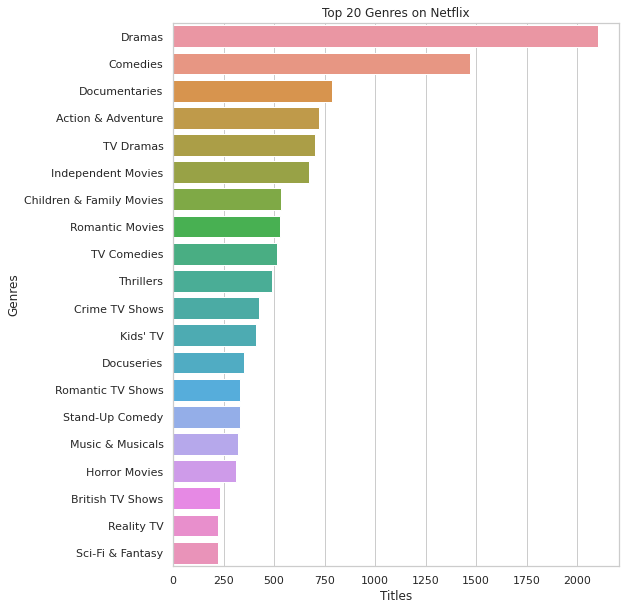

In [ ]:
filtered_genres = nf.set_index('title').genres.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(8,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In terms of genres, Dramas is on the top followed by Comedies and Documentaries.

# **4.7 How content is distributed based on maturity level - kids, teens, and adults**

In [ ]:
def generate_rating_df(nf):
    rating_df = nf.groupby(['rating', 'ratings_cat']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'ratings_cat', 'counts']
    rating_df = rating_df.sort_values('ratings_cat')
    return rating_df


rating_df = generate_rating_df(nf)
fig = px.bar(rating_df, x='rating', y='counts', color='ratings_cat', title='Ratings of Movies And TV Shows Based On Target Age Groups',  labels={'counts':'COUNT', 'rating':'RATINGS', 'target_ages':'TARGET AGE GROUPS' })
fig.show()

# **4.8 Distribution of Release Type**

In [ ]:
def release(release_date):
    if 1960<=release_date<=1990:
        return 'Very old'
    elif 1990<release_date<= 2000:
        return 'Old'
    elif 2000<release_date<=2015:
        return 'Early 21st century'
    elif 2015<release_date<=2021:
        return 'New'
    else:
        return None
nf['Movie Release type']=nf['release_year'].apply(release)

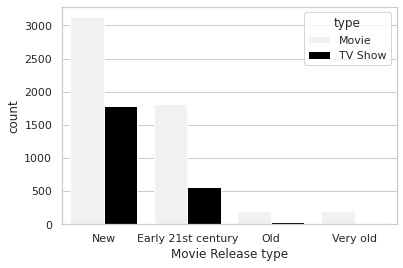

In [ ]:
t=nf.groupby('Movie Release type').type.value_counts()
sns.countplot(nf['Movie Release type'][:],hue=nf['type'],color='black')

# **5. Asking and Answering Questions**

# **Who are the top 10 directors on Netflix with the most releases?**

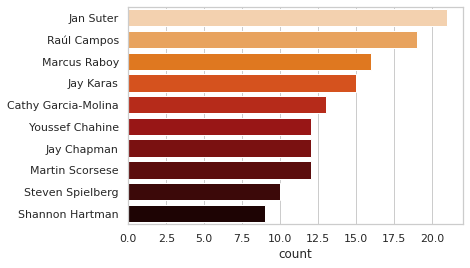

In [ ]:
filtered_directors = nf[nf.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='gist_heat_r')
plt.show()

# **Who are the top 10 actors on Netflix based on the number of titles?**

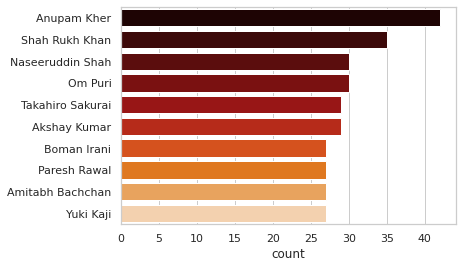

In [ ]:
filtered_cast = nf[nf.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='gist_heat')
plt.show()

 Majority of Netflix movies are having Indian actors.

In this list, we can see that the most popular actors on Netflix based on the number of titles are international as well

# **Can Netflix Draw Our Attention Just by Titles Description?**

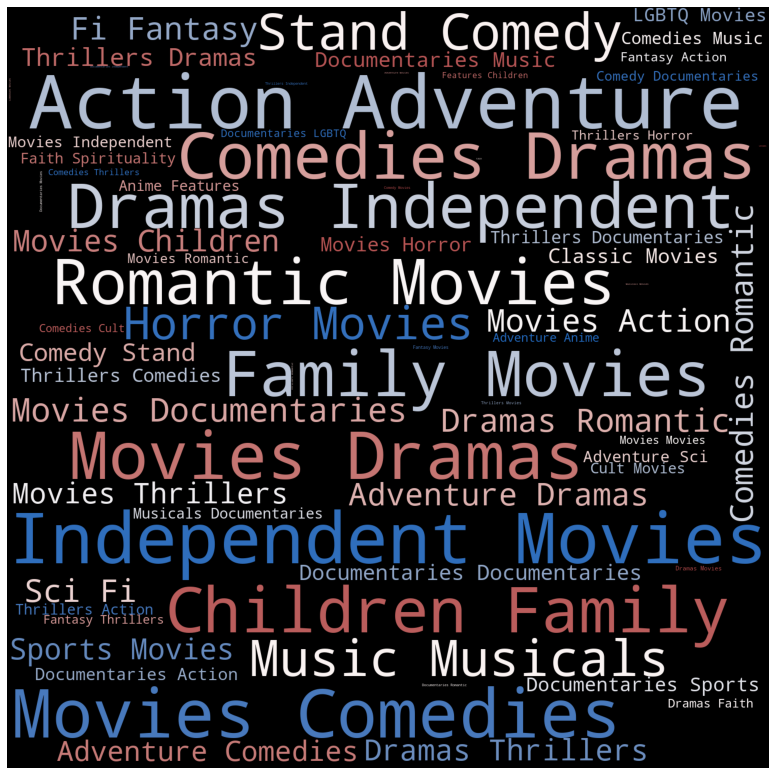

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(nf_movies['genres'])

plt.rcParams['figure.figsize'] = (14,14)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1500,  height = 1500, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Plotting  the same for TV Shows

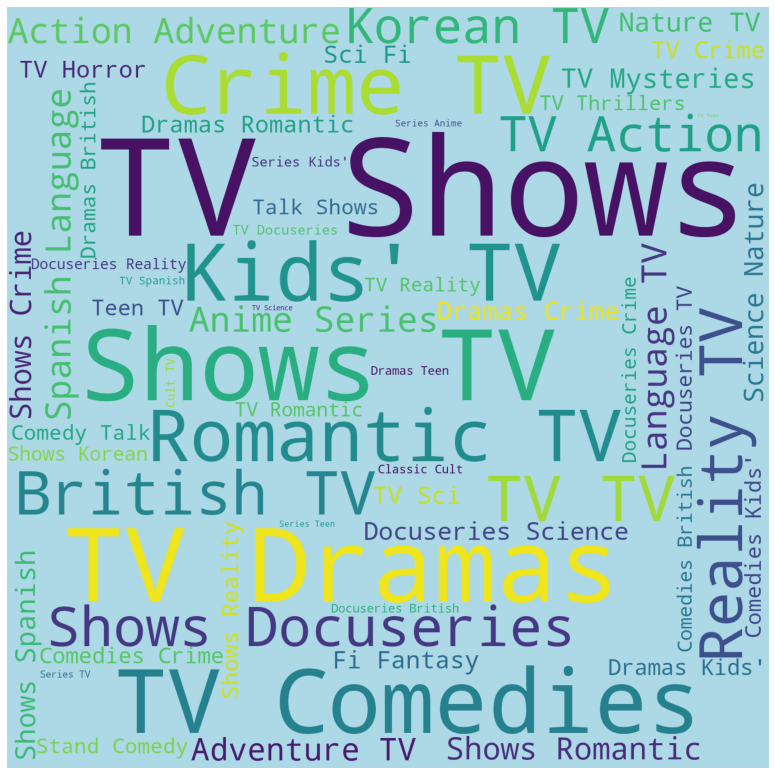

In [ ]:
text = ' '.join(nf_shows['genres'])

plt.rcParams['figure.figsize'] = (14,14)
wordcloud = WordCloud(background_color = 'lightblue', width = 1500,  height = 1500, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **What type of content is available in different countries?**

In [ ]:
def nf_by_country(nf, country):
  '''
  Returns a filtered nf with shows available to a specific country
  Input: A dataframe and a selected country name
  Output: A dictionary with country as key and show_id as value
  '''
  drop_country_na = nf[nf['country'].notna()]
  return drop_country_na[drop_country_na['country'].str.contains(country)]

In [ ]:
def top_genre_by_country(df, country):
  genre_counter = c.Counter(", ".join(nf_by_country(nf, country)['genres']).split(", ")).most_common(10)
  genre = [val[0] for val in genre_counter][::-1]
  count = [val[1] for val in genre_counter][::-1]
  return genre, count

fig = make_subplots(rows=2, cols=2, horizontal_spacing=0.4,
      subplot_titles=("USA",'France', 'Japan', 'South Korea'))
country = ['United States', 'France', 'Japan', 'South Korea']
colors = ['yellow', 'blue', 'black', 'green']
position = [(1,1), (1,2), (2,1), (2,2)]

for i in np.arange(len(country)):
  genre, count = top_genre_by_country(nf, country[i])
  fig.add_trace(go.Bar(y=genre, x=count,
                       orientation="h", name="",
                       marker=dict(color=colors[i])), position[i][0],  position[i][1])

  fig.update_layout(showlegend=False, height = 650, width = 900, title_text="Top genres by country")

fig.show()

The top 10 genre of netflix varies from country to country, which reflects the different tastes of audience from different countries.

# **Finding if netflix has increasingly focusing on TV shows rather than movies in recent years.**


In [ ]:
tv_add_count = nf[nf['type'] == 'TV Show'].groupby('year_added').size().reset_index(name = 'added_count').iloc[0:9,:]
movie_add_count = nf[nf['type'] == 'Movie'].groupby('year_added').size().reset_index(name = 'added_count').iloc[0:12,:]
trace1 = go.Scatter(x=tv_add_count['year_added'], y=tv_add_count['added_count'], name="TV Shows", marker=dict(color="green"))
trace2 = go.Scatter(x=movie_add_count["year_added"], y=movie_add_count['added_count'], name="Movies", marker=dict(color="red"))
data = [trace1, trace2]
layout = go.Layout(title="TV shows vs. Movies added over the years", width = 900, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

 From the above plot we can see  that the number of movies added to netflix is higher than that of TV shows. In 2019, netflix added 1497 movies and 656 TV shows. So there we cannot conclude that netflix has switched focus from movies to TV shows.



# **TEXT CLEANING AND FEATURE ENGINEERING**

# **Encoding the categorical data**

First, we transform column data to a list so that we can do suitable actions in columns. Then we find the unique cast, directors, and genres for these columns.

In [ ]:
# Replacing the values where the director is null with appropriate strings
nf["director"] = nf["director"].fillna("")
nf["cast"] = nf["cast"].fillna("")
nf["country"] = nf["country"].fillna("United States")
#nf["date_added"] = nf["date_added"].fillna("")
nf["rating"] = nf["rating"].fillna("")

In [ ]:
#Taking the primary country into account for each record and not the others
nf.country = nf.country.str.split(',')
nf.loc[:, 'country'] = nf.country.map(lambda x: x[0])

In [ ]:
#Taking the primary director into account for each record and not the others
nf.director = nf.director.str.split(',')
nf.loc[:, 'director'] = nf.director.map(lambda x: x[0])

In [ ]:
#Taking the primary cast member into account for each record and not the others
nf.cast = nf.cast.str.split(',')
nf.loc[:, 'cast'] = nf.cast.map(lambda x: x[0])

In [ ]:
#Combine the above featured for vectorization
nf["combined_text_feat"] = nf['genres'].astype(str) + " " + nf['description'].astype(str) + " " + nf['type'].astype(str) + " "  + nf['country'].astype(str) + " " + nf['cast'].astype(str) + " " + nf['rating'].astype(str)

# **Removing punctuations**

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
nf['description'] = nf['description'].apply(remove_punctuation)
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                              genres  \
0                     TV Dramas, TV Sci-Fi & Fantasy   
1                                             Dramas   
2                                      Horror Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead his fellow ...        2018           12   
3  In a postapocalyptic world ragdoll robots hide...        2017           11   
4  A brilliant group of students become cardcount...        2020            1   

   international ratings_cat  Movie Release type  \
0           True      Adults                 New   
1           True      Adults                 New   
2           True      Adults  Early 21st century   
3          False       Teens  Early 21st century   
4          False       Teens  Early 21st century   

                                  combined_text_feat  
0  TV Dramas, TV Sci-Fi & Fantasy In a future whe...  
1  Dramas After a devastating earthquake hits Mex...  
2  Horror Movies When an army recruit is found de...  
3  Action & Adventure, Independent Movies, Sci-Fi...  
4  Dramas A brilliant group of students become ca...

In [ ]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(nf['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

# **Creating a new DataFrame vocab_before_stemming**

In [ ]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [ ]:
vocab_before_stemming.head()

Word  count
18955      şeref  19694
10485      ōarai  19693
12474     łukasz  19692
11196  überelite  19691
11768       über  19690

In [ ]:
vocab_before_stemming.tail()

Word  count
8416  1000      4
706    100      3
7714    10      2
8060   009      1
6964   007      0

In [ ]:
top15_most_ocurred_vocab = vocab_before_stemming.head(10)

In [ ]:
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelite', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex'], dtype=object)

In [ ]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values
top15_most_occurred_words_count

array([19694, 19693, 19692, 19691, 19690, 19689, 19688, 19687, 19686,
       19685])

<BarContainer object of 10 artists>

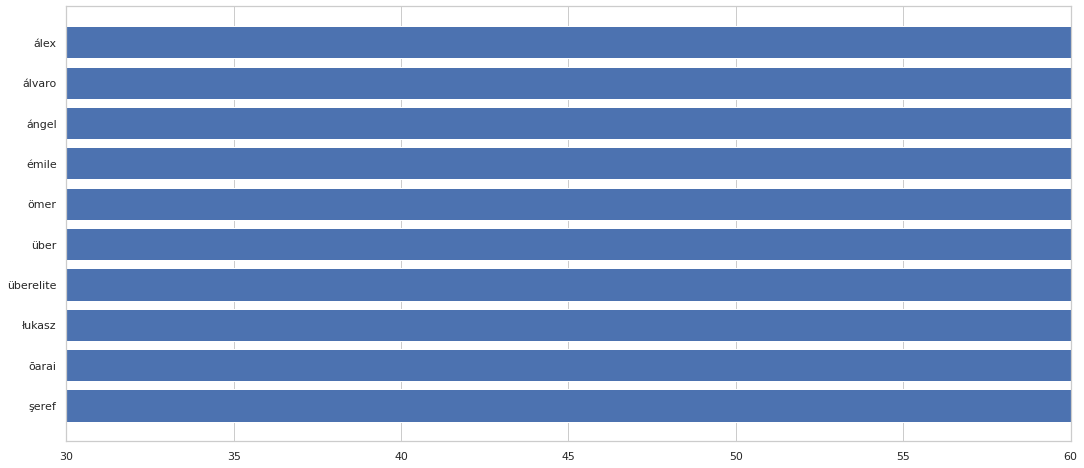

In [ ]:
plt.figure( figsize = ( 18,8 ))
plt.xlim(30, 60)
plt.barh(top15_most_occurred_words,top15_most_occurred_words_count)

# **STEMMING**

In [ ]:
#Removing stopwords
# extracting the stopwords from nltk library
from nltk.stem import PorterStemmer

import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print("Number of stopwords in english : ", len(sw))

Number of stopwords in english :  179


In [ ]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [ ]:
stemmer = PorterStemmer()
# Cleaning the text
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(inp_str):

    # Lowercase text
    inp_str = inp_str.lower()

    # Replace REPLACE_BY_SPACE_RE symbols by space in text
    inp_str = REPLACE_BY_SPACE_RE.sub(' ', inp_str)

    # Remove the XXXX values
    inp_str = inp_str.replace('x', '')

    # Remove white space
    inp_str = REMOVE_NUM.sub('', inp_str)

    # Remove symbols which are in BAD_SYMBOLS_RE from text
    inp_str = BAD_SYMBOLS_RE.sub('', inp_str)

    # Remove stopwords from text
    inp_str = ' '.join(word for word in inp_str.split() if word not in STOPWORDS)

    # Remove any words composed of less than 2 or more than 21 letters
    inp_str = ' '.join(word for word in inp_str.split() if (len(word) >= 2 and len(word) <= 21))

    # Stemming the words
    inp_str = ' '.join([stemmer.stem(word) for word in inp_str.split()])

    return inp_str

In [ ]:
#applying the clean text funtion to the combined feature column for cleanup
nf["combined_text_feat"] = nf["combined_text_feat"].apply(clean_text)
nf["combined_text_feat"]

0       tv drama tv scifi fantasi futur elit inhabit i...
1       drama devast earthquak hit meico citi trap sur...
2       horror movi armi recruit found dead fellow sol...
3       action adventur independ movi scifi fantasi po...
4       drama brilliant group student becom cardcount ...
                              ...                        
7782    drama lebanon civil war depriv zozo famili he ...
7783    drama music music scrappi poor boy worm way ty...
7784    documentari music music documentari south afri...
7785    realiti tv dessert wizard adriano zumbo look n...
7786    documentari music music documentari delv mysti...
Name: combined_text_feat, Length: 7770, dtype: object

Now,all the values of description are free from  punctutations and stopwords.

# **Type of content available**

In [ ]:
nf['filtered'] = nf['description'] + ' '+ nf['genres']

In [ ]:
import re
def cleaned(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))
nf['filtered'] = nf['filtered'].apply(cleaned)

In [ ]:
nf['filtered' ]= nf['filtered'].str.lower()

# **SnowballStemmer( 'english' )**

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [ ]:
# Create an object of stemming function
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [ ]:
def wordfilter(string, filtwords):
    filtered = []
    tokens = word_tokenize(string)
    for word in tokens:
        if word not in filtwords:
            filtered.append(stemmer.stem(word))
    return filtered

nf['filtered_new'] = ''
for item, row in nf.iterrows():
    nf.at[item, 'filtered_new'] = wordfilter(row['filtered'], stop_words)

nf['filtered_new']

0       [futur, elit, inhabit, island, paradis, far, c...
1       [devast, earthquak, hit, mexico, citi, trap, s...
2       [armi, recruit, found, dead, fellow, soldier, ...
3       [postapocalypt, world, ragdol, robot, hide, fe...
4       [brilliant, group, student, becom, cardcount, ...
                              ...                        
7782    [lebanon, civil, war, depriv, zozo, famili, he...
7783    [scrappi, poor, boy, worm, way, tycoon, dysfun...
7784    [documentari, south, african, rapper, nasti, c...
7785    [dessert, wizard, adriano, zumbo, look, next, ...
7786    [documentari, delv, mystiqu, behind, bluesrock...
Name: filtered_new, Length: 7770, dtype: object

In [ ]:
def join_words(x):
  return " ".join(x)
nf['filtered_new'] = nf['filtered_new'].apply(join_words)

In [ ]:
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                              genres  \
0                     TV Dramas, TV Sci-Fi & Fantasy   
1                                             Dramas   
2                                      Horror Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead his fellow ...        2018           12   
3  In a postapocalyptic world ragdoll robots hide...        2017           11   
4  A brilliant group of students become cardcount...        2020            1   

   international ratings_cat  Movie Release type  \
0           True      Adults                 New   
1           True      Adults                 New   
2           True      Adults  Early 21st century   
3          False       Teens  Early 21st century   
4          False       Teens  Early 21st century   

                                  combined_text_feat  \
0  tv drama tv scifi fantasi futur elit inhabit i...   
1  drama devast earthquak hit meico citi trap sur...   
2  horror movi armi recruit found dead fellow sol...   
3  action adventur independ movi scifi fantasi po...   
4  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new  
0  futur elit inhabit island paradis far crowd sl...  
1  devast earthquak hit mexico citi trap survivor...  
2  armi recruit found dead fellow soldier forc co...  
3  postapocalypt world ragdol robot hide fear dan...  
4  brilliant group student becom cardcount expert...

In [ ]:
def Apply_stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
#Stemming for description
nf['description'] = nf['description'].apply( Apply_stemming )
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                              genres  \
0                     TV Dramas, TV Sci-Fi & Fantasy   
1                                             Dramas   
2                                      Horror Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  in a futur where the elit inhabit an island pa...        2020            8   
1  after a devast earthquak hit mexico citi trap ...        2016           12   
2  when an armi recruit is found dead his fellow ...        2018           12   
3  in a postapocalypt world ragdol robot hide in ...        2017           11   
4  a brilliant group of student becom cardcount e...        2020            1   

   international ratings_cat  Movie Release type  \
0           True      Adults                 New   
1           True      Adults                 New   
2           True      Adults  Early 21st century   
3          False       Teens  Early 21st century   
4          False       Teens  Early 21st century   

                                  combined_text_feat  \
0  tv drama tv scifi fantasi futur elit inhabit i...   
1  drama devast earthquak hit meico citi trap sur...   
2  horror movi armi recruit found dead fellow sol...   
3  action adventur independ movi scifi fantasi po...   
4  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new  
0  futur elit inhabit island paradis far crowd sl...  
1  devast earthquak hit mexico citi trap survivor...  
2  armi recruit found dead fellow soldier forc co...  
3  postapocalypt world ragdol robot hide fear dan...  
4  brilliant group student becom cardcount expert...

# **VECTORIZATION**

# **TF-IDF**

In [ ]:
# Run TF IDF Vectorizer on the text data
from sklearn.feature_extraction.text import TfidfVectorizer

# sublinear_df is set to True to use a logarithmic form for frequency
# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features

vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_vc = vectorizer.fit_transform(nf["combined_text_feat"])

pd.DataFrame(X_vc.toarray(), columns=vectorizer.get_feature_names()).head()

aamir  aamir khan  aaron  abandon  abduct  abil  aboard  abraham  absurd  \
0    0.0         0.0    0.0      0.0     0.0   0.0     0.0      0.0     0.0   
1    0.0         0.0    0.0      0.0     0.0   0.0     0.0      0.0     0.0   
2    0.0         0.0    0.0      0.0     0.0   0.0     0.0      0.0     0.0   
3    0.0         0.0    0.0      0.0     0.0   0.0     0.0      0.0     0.0   
4    0.0         0.0    0.0      0.0     0.0   0.0     0.0      0.0     0.0   

   abus  ...  young son  young woman  young women  younger  youth  zach  zani  \
0   0.0  ...        0.0          0.0          0.0      0.0    0.0   0.0   0.0   
1   0.0  ...        0.0          0.0          0.0      0.0    0.0   0.0   0.0   
2   0.0  ...        0.0          0.0          0.0      0.0    0.0   0.0   0.0   
3   0.0  ...        0.0          0.0          0.0      0.0    0.0   0.0   0.0   
4   0.0  ...        0.0          0.0          0.0      0.0    0.0   0.0   0.0   

   zealand  zoe  zombi  
0      0.0  0.0    0.0  
1      0.0  0.0    0.0  
2      0.0  0.0    0.0  
3      0.0  0.0    0.0  
4      0.0  0.0    0.0  

[5 rows x 2784 columns]

In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(nf['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

In [ ]:
words = nf.filtered_new
t_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 1, max_features=10000)
X= t_vectorizer.fit_transform(words)
X

<7770x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 127011 stored elements in Compressed Sparse Row format>

# **Creating a new DataFrame vocab_after_stemming**

In [ ]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [ ]:
top15_most_ocurred_vocab = vocab_after_stemming.head(15)

In [ ]:
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelit', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [ ]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values
top15_most_occurred_words_count

array([14320, 14319, 14318, 14317, 14316, 14315, 14314, 14313, 14312,
       14311, 14310, 14309, 14308, 14307, 14306])

<BarContainer object of 15 artists>

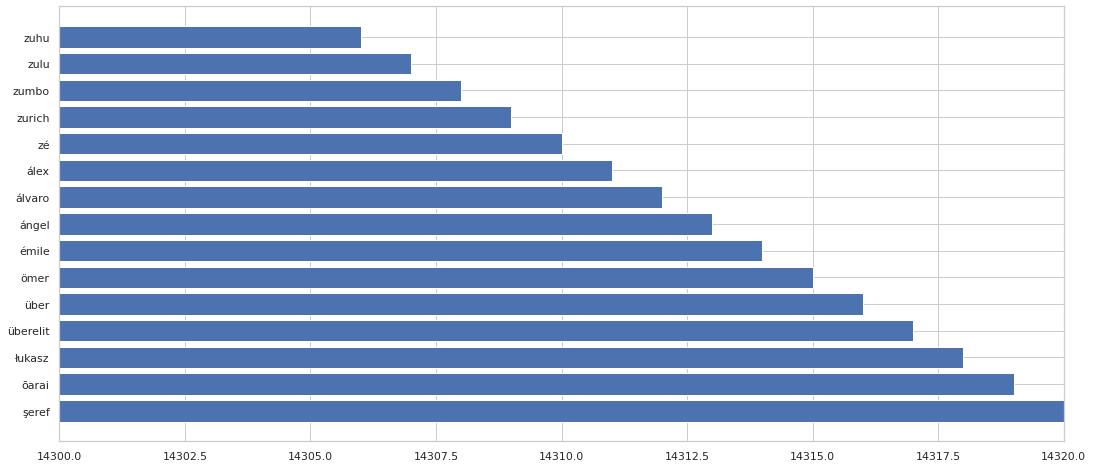

In [ ]:
plt.figure( figsize = ( 18,8 ))
plt.xlim(14300, 14320)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

# **Adding a new column length  containing length of description**

In [ ]:
nf['Length(description)'] = nf['description'].apply(lambda x: len(x))

In [ ]:
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  ...  \
0    August 14, 2020          2020  TV-MA  4 Seasons  ...   
1  December 23, 2016          2016  TV-MA     93 min  ...   
2  December 20, 2018          2011      R     78 min  ...   
3  November 16, 2017          2009  PG-13     80 min  ...   
4    January 1, 2020          2008  PG-13    123 min  ...   

                                         description year_added  month_added  \
0  in a futur where the elit inhabit an island pa...       2020            8   
1  after a devast earthquak hit mexico citi trap ...       2016           12   
2  when an armi recruit is found dead his fellow ...       2018           12   
3  in a postapocalypt world ragdol robot hide in ...       2017           11   
4  a brilliant group of student becom cardcount e...       2020            1   

   international  ratings_cat  Movie Release type  \
0           True       Adults                 New   
1           True       Adults                 New   
2           True       Adults  Early 21st century   
3          False        Teens  Early 21st century   
4          False        Teens  Early 21st century   

                                  combined_text_feat  \
0  tv drama tv scifi fantasi futur elit inhabit i...   
1  drama devast earthquak hit meico citi trap sur...   
2  horror movi armi recruit found dead fellow sol...   
3  action adventur independ movi scifi fantasi po...   
4  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new Length(description)  
0  futur elit inhabit island paradis far crowd sl...                 125  
1  devast earthquak hit mexico citi trap survivor...                 123  
2  armi recruit found dead fellow soldier forc co...                 132  
3  postapocalypt world ragdol robot hide fear dan...                 126  
4  brilliant group student becom cardcount expert...                 126  

[5 rows x 21 columns]

In [ ]:
nf.description.iloc[0]

'in a futur where the elit inhabit an island paradis far from the crowd slum you get one chanc to join the 3 save from squalor'

In [ ]:
len(nf.description.iloc[0])

125

# **Creating a new DataFrame vocab_after_stemming_listed_in & removing punctutations**

In [ ]:
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description',
       'year_added', 'month_added', 'international', 'ratings_cat',
       'Movie Release type', 'combined_text_feat', 'filtered', 'filtered_new',
       'Length(description)'],
      dtype='object')

In [ ]:
nf['genres'] = nf['genres'].apply(remove_punctuation)
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  ...  \
0    August 14, 2020          2020  TV-MA  4 Seasons  ...   
1  December 23, 2016          2016  TV-MA     93 min  ...   
2  December 20, 2018          2011      R     78 min  ...   
3  November 16, 2017          2009  PG-13     80 min  ...   
4    January 1, 2020          2008  PG-13    123 min  ...   

                                         description year_added  month_added  \
0  in a futur where the elit inhabit an island pa...       2020            8   
1  after a devast earthquak hit mexico citi trap ...       2016           12   
2  when an armi recruit is found dead his fellow ...       2018           12   
3  in a postapocalypt world ragdol robot hide in ...       2017           11   
4  a brilliant group of student becom cardcount e...       2020            1   

   international  ratings_cat  Movie Release type  \
0           True       Adults                 New   
1           True       Adults                 New   
2           True       Adults  Early 21st century   
3          False        Teens  Early 21st century   
4          False        Teens  Early 21st century   

                                  combined_text_feat  \
0  tv drama tv scifi fantasi futur elit inhabit i...   
1  drama devast earthquak hit meico citi trap sur...   
2  horror movi armi recruit found dead fellow sol...   
3  action adventur independ movi scifi fantasi po...   
4  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new Length(description)  
0  futur elit inhabit island paradis far crowd sl...                 125  
1  devast earthquak hit mexico citi trap survivor...                 123  
2  armi recruit found dead fellow soldier forc co...                 132  
3  postapocalypt world ragdol robot hide fear dan...                 126  
4  brilliant group student becom cardcount expert...                 126  

[5 rows x 21 columns]

In [ ]:
#Remove stopwords for listed_in(genres)
nf['genres'] = nf['genres'].apply( remove_stopwords )
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  ...  \
0    August 14, 2020          2020  TV-MA  4 Seasons  ...   
1  December 23, 2016          2016  TV-MA     93 min  ...   
2  December 20, 2018          2011      R     78 min  ...   
3  November 16, 2017          2009  PG-13     80 min  ...   
4    January 1, 2020          2008  PG-13    123 min  ...   

                                         description year_added  month_added  \
0  in a futur where the elit inhabit an island pa...       2020            8   
1  after a devast earthquak hit mexico citi trap ...       2016           12   
2  when an armi recruit is found dead his fellow ...       2018           12   
3  in a postapocalypt world ragdol robot hide in ...       2017           11   
4  a brilliant group of student becom cardcount e...       2020            1   

   international  ratings_cat  Movie Release type  \
0           True       Adults                 New   
1           True       Adults                 New   
2           True       Adults  Early 21st century   
3          False        Teens  Early 21st century   
4          False        Teens  Early 21st century   

                                  combined_text_feat  \
0  tv drama tv scifi fantasi futur elit inhabit i...   
1  drama devast earthquak hit meico citi trap sur...   
2  horror movi armi recruit found dead fellow sol...   
3  action adventur independ movi scifi fantasi po...   
4  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new Length(description)  
0  futur elit inhabit island paradis far crowd sl...                 125  
1  devast earthquak hit mexico citi trap survivor...                 123  
2  armi recruit found dead fellow soldier forc co...                 132  
3  postapocalypt world ragdol robot hide fear dan...                 126  
4  brilliant group student becom cardcount expert...                 126  

[5 rows x 21 columns]

# **Using CountVectorizer() to count vocabulary items**

In [ ]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(nf['genres'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
dictionary

dict_items([('tv', 40), ('dramas', 12), ('scifi', 30), ('fantasy', 15), ('horror', 17), ('movies', 22), ('action', 0), ('adventure', 1), ('independent', 18), ('mysteries', 25), ('thrillers', 39), ('crime', 8), ('shows', 32), ('docuseries', 11), ('documentaries', 10), ('sports', 35), ('comedies', 6), ('anime', 2), ('series', 31), ('reality', 27), ('romantic', 28), ('science', 29), ('nature', 26), ('british', 3), ('korean', 20), ('music', 23), ('musicals', 24), ('lgbtq', 21), ('faith', 13), ('spirituality', 34), ('kids', 19), ('spanishlanguage', 33), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('standup', 36), ('comedy', 7), ('talk', 37), ('teen', 38), ('features', 16)])

In [ ]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [ ]:
listed_in_vocab_before_stem = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})

listed_in_vocab_before_stem = listed_in_vocab_before_stem.sort_values("count" ,ascending=False)

In [ ]:
listed_in_vocab_before_stem.head().append(listed_in_vocab_before_stem.tail())

Word  count
0          tv     40
10  thrillers     39
39       teen     38
38       talk     37
36    standup     36
32   children      4
23    british      3
17      anime      2
7   adventure      1
6      action      0

# **TOP 15 most occurred words in listed in**

In [ ]:
top15_most_ocurred_vocab_listed_in = listed_in_vocab_before_stem.head(15)

In [ ]:
top15_most_ocurred_words_listed_in = top15_most_ocurred_vocab_listed_in.Word.values
top15_most_ocurred_words_listed_in

array(['tv', 'thrillers', 'teen', 'talk', 'standup', 'sports',
       'spirituality', 'spanishlanguage', 'shows', 'series', 'scifi',
       'science', 'romantic', 'reality', 'nature'], dtype=object)

In [ ]:
top15_most_occurred_words_in_listed_in_count = top15_most_ocurred_vocab_listed_in['count'].values
top15_most_occurred_words_in_listed_in_count

array([40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26])

<BarContainer object of 15 artists>

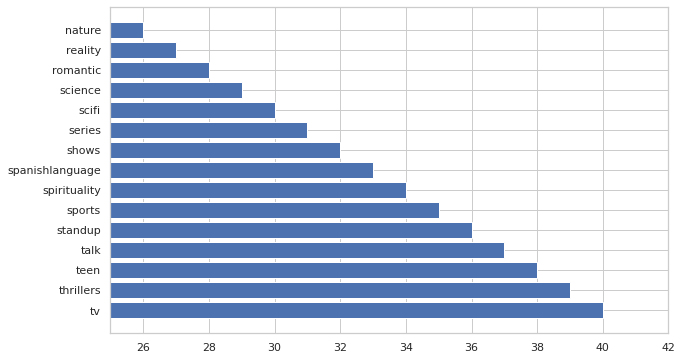

In [ ]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 42 )
plt.barh(top15_most_ocurred_words_listed_in , top15_most_occurred_words_in_listed_in_count )

In [ ]:
#SNOWBALL STEMMER FOR ENGLISH
#Stemming for description
nf['genres'] = nf['genres'].apply( Apply_stemming )
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  ...  \
0    August 14, 2020          2020  TV-MA  4 Seasons  ...   
1  December 23, 2016          2016  TV-MA     93 min  ...   
2  December 20, 2018          2011      R     78 min  ...   
3  November 16, 2017          2009  PG-13     80 min  ...   
4    January 1, 2020          2008  PG-13    123 min  ...   

                                         description year_added  month_added  \
0  in a futur where the elit inhabit an island pa...       2020            8   
1  after a devast earthquak hit mexico citi trap ...       2016           12   
2  when an armi recruit is found dead his fellow ...       2018           12   
3  in a postapocalypt world ragdol robot hide in ...       2017           11   
4  a brilliant group of student becom cardcount e...       2020            1   

   international  ratings_cat  Movie Release type  \
0           True       Adults                 New   
1           True       Adults                 New   
2           True       Adults  Early 21st century   
3          False        Teens  Early 21st century   
4          False        Teens  Early 21st century   

                                  combined_text_feat  \
0  tv drama tv scifi fantasi futur elit inhabit i...   
1  drama devast earthquak hit meico citi trap sur...   
2  horror movi armi recruit found dead fellow sol...   
3  action adventur independ movi scifi fantasi po...   
4  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new Length(description)  
0  futur elit inhabit island paradis far crowd sl...                 125  
1  devast earthquak hit mexico citi trap survivor...                 123  
2  armi recruit found dead fellow soldier forc co...                 132  
3  postapocalypt world ragdol robot hide fear dan...                 126  
4  brilliant group student becom cardcount expert...                 126  

[5 rows x 21 columns]

# **Now will use tf-idf Vectorizer (after stemming)**

In [ ]:
# Create the object of tfidf vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(nf['genres'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
dictionary

dict_items([('tv', 38), ('drama', 11), ('scifi', 28), ('fantasi', 14), ('horror', 16), ('movi', 21), ('action', 0), ('adventur', 1), ('independ', 17), ('mysteri', 23), ('thriller', 37), ('crime', 7), ('show', 30), ('docuseri', 10), ('documentari', 9), ('sport', 33), ('comedi', 6), ('anim', 2), ('seri', 29), ('realiti', 25), ('romant', 26), ('scienc', 27), ('natur', 24), ('british', 3), ('korean', 19), ('music', 22), ('lgbtq', 20), ('faith', 12), ('spiritu', 32), ('kid', 18), ('spanishlanguag', 31), ('children', 4), ('famili', 13), ('classic', 5), ('cult', 8), ('standup', 34), ('talk', 35), ('teen', 36), ('featur', 15)])

In [ ]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

# **Creating a new DataFrame vocab_after_stemming_listed_in**

In [ ]:
vocab_after_stemming_listed_in = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
# Sort the dataframe by count
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count" ,ascending=False)

In [ ]:
top15_most_ocurred_vocab_lised_in_after_stem = vocab_after_stemming_listed_in.head(15)

In [ ]:
top15_most_ocurred_vocab_lised_in_after_stem_word = top15_most_ocurred_vocab_lised_in_after_stem.Word.values
top15_most_ocurred_vocab_lised_in_after_stem_word

array(['tv', 'thriller', 'teen', 'talk', 'standup', 'sport', 'spiritu',
       'spanishlanguag', 'show', 'seri', 'scifi', 'scienc', 'romant',
       'realiti', 'natur'], dtype=object)

In [ ]:
top15_most_occurred_words_listed_in_count = top15_most_ocurred_vocab_lised_in_after_stem['count'].values
top15_most_occurred_words_listed_in_count

array([38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24])

<BarContainer object of 15 artists>

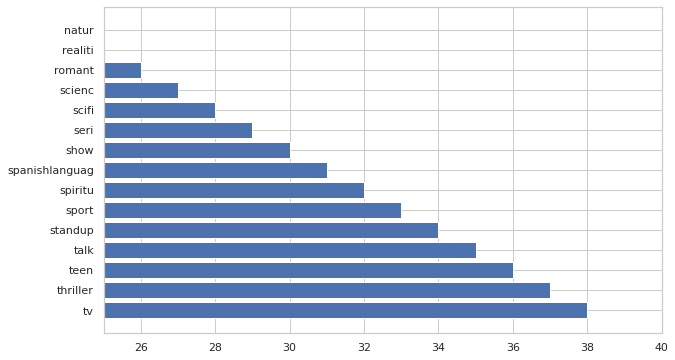

In [ ]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 40 )
plt.barh(top15_most_ocurred_vocab_lised_in_after_stem_word , top15_most_occurred_words_listed_in_count )

# **Adding a new column length( listed-in ) which will contain length of listed_in**

In [ ]:
nf['Length(genres)'] = nf['genres'].apply(lambda x: len(x))
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  ... year_added  \
0    August 14, 2020          2020  TV-MA  4 Seasons  ...       2020   
1  December 23, 2016          2016  TV-MA     93 min  ...       2016   
2  December 20, 2018          2011      R     78 min  ...       2018   
3  November 16, 2017          2009  PG-13     80 min  ...       2017   
4    January 1, 2020          2008  PG-13    123 min  ...       2020   

  month_added  international  ratings_cat  Movie Release type  \
0           8           True       Adults                 New   
1          12           True       Adults                 New   
2          12           True       Adults  Early 21st century   
3          11          False        Teens  Early 21st century   
4           1          False        Teens  Early 21st century   

                                  combined_text_feat  \
0  tv drama tv scifi fantasi futur elit inhabit i...   
1  drama devast earthquak hit meico citi trap sur...   
2  horror movi armi recruit found dead fellow sol...   
3  action adventur independ movi scifi fantasi po...   
4  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new Length(description)  \
0  futur elit inhabit island paradis far crowd sl...                 125   
1  devast earthquak hit mexico citi trap survivor...                 123   
2  armi recruit found dead fellow soldier forc co...                 132   
3  postapocalypt world ragdol robot hide fear dan...                 126   
4  brilliant group student becom cardcount expert...                 126   

  Length(genres)  
0             25  
1              5  
2             11  
3             43  
4              5  

[5 rows x 22 columns]

In [ ]:
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description',
       'year_added', 'month_added', 'international', 'ratings_cat',
       'Movie Release type', 'combined_text_feat', 'filtered', 'filtered_new',
       'Length(description)', 'Length(genres)'],
      dtype='object')

In [ ]:
nf[['description', 'Length(description)', 'genres' ,'Length(genres)' ]].head()

description  Length(description)  \
0  in a futur where the elit inhabit an island pa...                  125   
1  after a devast earthquak hit mexico citi trap ...                  123   
2  when an armi recruit is found dead his fellow ...                  132   
3  in a postapocalypt world ragdol robot hide in ...                  126   
4  a brilliant group of student becom cardcount e...                  126   

                                        genres  Length(genres)  
0                    tv drama tv scifi fantasi              25  
1                                        drama               5  
2                                  horror movi              11  
3  action adventur independ movi scifi fantasi              43  
4                                        drama               5

# **Applying Different Clustering Algorithms**

# **Clustering**:
Clustering can be considered the most important unsupervised learning problem. So, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data. A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.

A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

We have used 5 clustering algorithms:

1.Silhouette score

2.Elbow Method

3.DBSCAN

4.Dendrogram

5.Agglomerative clustering

# **1.Silhouette Score**

In [ ]:
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description',
       'year_added', 'month_added', 'international', 'ratings_cat',
       'Movie Release type', 'combined_text_feat', 'filtered', 'filtered_new',
       'Length(description)', 'Length(genres)'],
      dtype='object')

In [ ]:
X_features_rec = nf[['Length(description)','Length(genres)']]
stdscaler = preprocessing.StandardScaler()
X_features_rec.describe()

Length(description)  Length(genres)
count          7770.000000     7770.000000
mean            127.255084       18.277735
std              10.668494        9.113991
min              51.000000        4.000000
25%             123.000000       11.000000
50%             129.000000       18.000000
75%             133.000000       24.000000
max             229.000000       55.000000

In [ ]:
X_rescale=stdscaler.fit_transform(X_features_rec)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [ ]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 2)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3492523531807158
For n_clusters = 3, silhouette score is 0.37281514079850314
For n_clusters = 4, silhouette score is 0.3860345117431574
For n_clusters = 5, silhouette score is 0.3640633581237277
For n_clusters = 6, silhouette score is 0.3496010333153998
For n_clusters = 7, silhouette score is 0.3566459651876703
For n_clusters = 8, silhouette score is 0.336616745528675
For n_clusters = 9, silhouette score is 0.335838456193169
For n_clusters = 10, silhouette score is 0.3288370025153447
For n_clusters = 11, silhouette score is 0.3331184524046595
For n_clusters = 12, silhouette score is 0.3354084534086651
For n_clusters = 13, silhouette score is 0.3351674199946564
For n_clusters = 14, silhouette score is 0.33480471464041256
For n_clusters = 15, silhouette score is 0.3370362158317324


In [ ]:
k_clusters = 45

In [ ]:
#Clustering the dataset with the optimal number of clusters
model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=42)
model.fit(X)

KMeans(max_iter=600, n_clusters=45, random_state=42, tol=1e-06)

In [ ]:
#Predict the clusters and evaluate the silhouette score
clusters = model.predict(X)
score = silhouette_score(X, clusters)
print("Silhouette score is {}".format(score))

Silhouette score is 0.3433770672843906


In [ ]:
#Adding a seperate column for the clusters
nf["Cluster Label"] = clusters
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  ... month_added  \
0    August 14, 2020          2020  TV-MA  4 Seasons  ...           8   
1  December 23, 2016          2016  TV-MA     93 min  ...          12   
2  December 20, 2018          2011      R     78 min  ...          12   
3  November 16, 2017          2009  PG-13     80 min  ...          11   
4    January 1, 2020          2008  PG-13    123 min  ...           1   

  international  ratings_cat  Movie Release type  \
0          True       Adults                 New   
1          True       Adults                 New   
2          True       Adults  Early 21st century   
3         False        Teens  Early 21st century   
4         False        Teens  Early 21st century   

                                  combined_text_feat  \
0  tv drama tv scifi fantasi futur elit inhabit i...   
1  drama devast earthquak hit meico citi trap sur...   
2  horror movi armi recruit found dead fellow sol...   
3  action adventur independ movi scifi fantasi po...   
4  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new Length(description)  \
0  futur elit inhabit island paradis far crowd sl...                 125   
1  devast earthquak hit mexico citi trap survivor...                 123   
2  armi recruit found dead fellow soldier forc co...                 132   
3  postapocalypt world ragdol robot hide fear dan...                 126   
4  brilliant group student becom cardcount expert...                 126   

  Length(genres) Cluster Label  
0             25             2  
1              5            13  
2             11            10  
3             43            34  
4              5            26  

[5 rows x 23 columns]

In [ ]:
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(15)

n clusters  silhouette score
2            4              0.39
1            3              0.37
3            5              0.36
5            7              0.36
0            2              0.35
4            6              0.35
6            8              0.34
7            9              0.34
10          12              0.34
11          13              0.34
13          15              0.34
8           10              0.33
9           11              0.33
12          14              0.33

The value of the silhouette coefﬁcient lies between [-1, 1]. A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.

For n_clusters = 2 The average silhouette_score is : 0.3492523531807158
For n_clusters = 3 The average silhouette_score is : 0.3728457920542489
For n_clusters = 4 The average silhouette_score is : 0.3858164929849192
For n_clusters = 5 The average silhouette_score is : 0.36299035293935233
For n_clusters = 6 The average silhouette_score is : 0.34942375790377794
For n_clusters = 7 The average silhouette_score is : 0.3583657461754652
For n_clusters = 8 The average silhouette_score is : 0.33662745114417286
For n_clusters = 9 The average silhouette_score is : 0.33486244184592806
For n_clusters = 10 The average silhouette_score is : 0.3343927629651298
For n_clusters = 11 The average silhouette_score is : 0.32869373193182994
For n_clusters = 12 The average silhouette_score is : 0.3333163837066848
For n_clusters = 13 The average silhouette_score is : 0.33444010870818985
For n_clusters = 14 The average silhouette_score is : 0.33242224882458515
For n_clusters = 15 The average silhouette_score is 

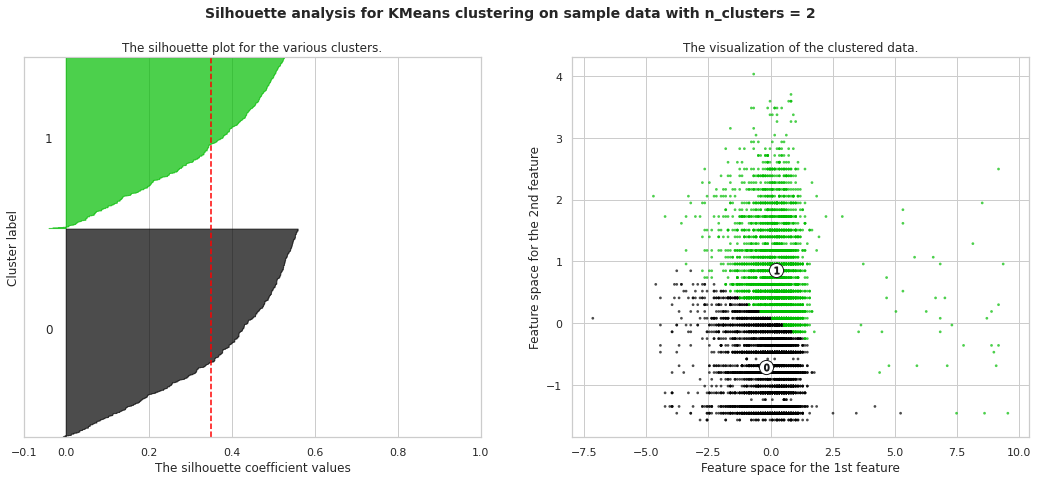

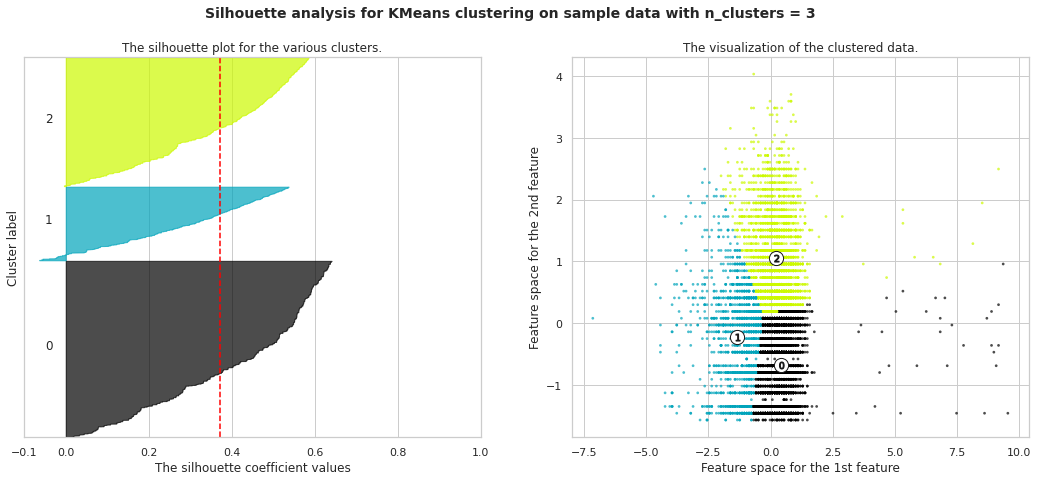

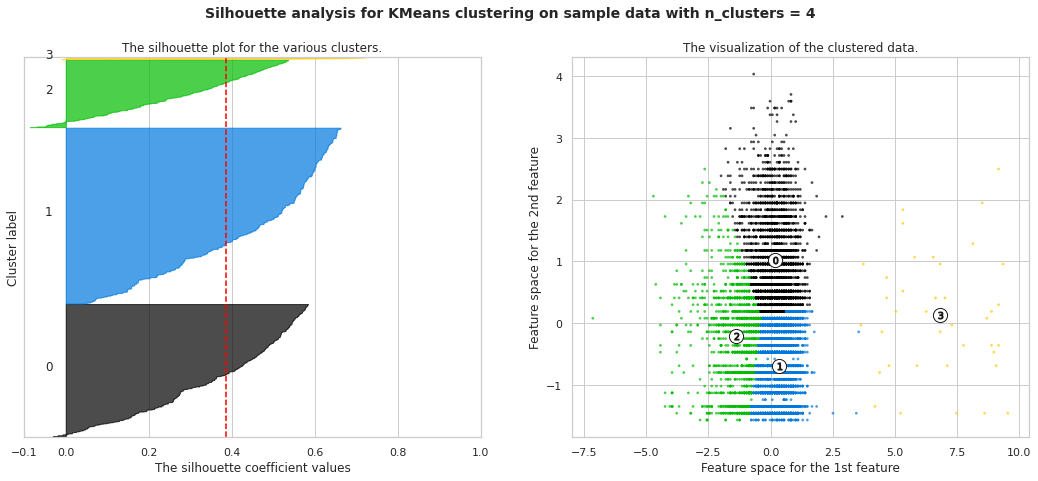

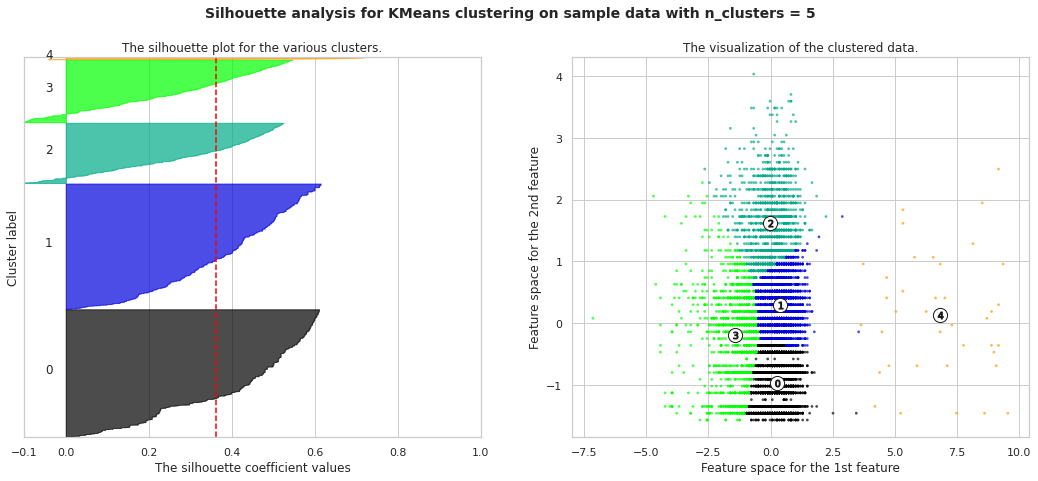

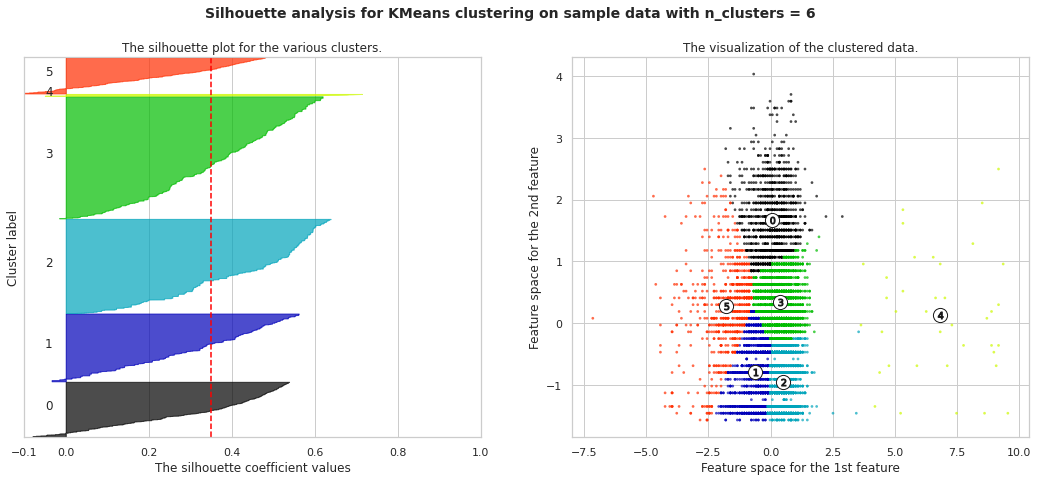

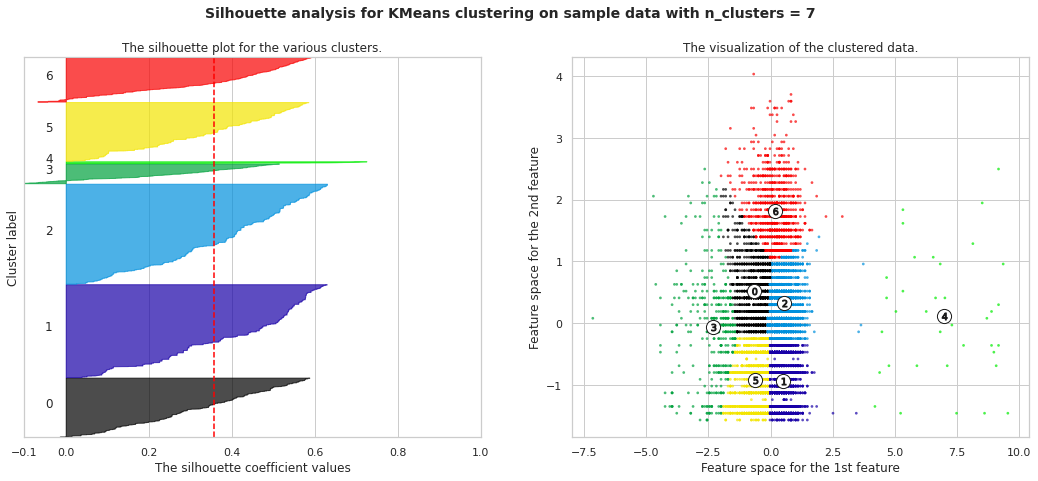

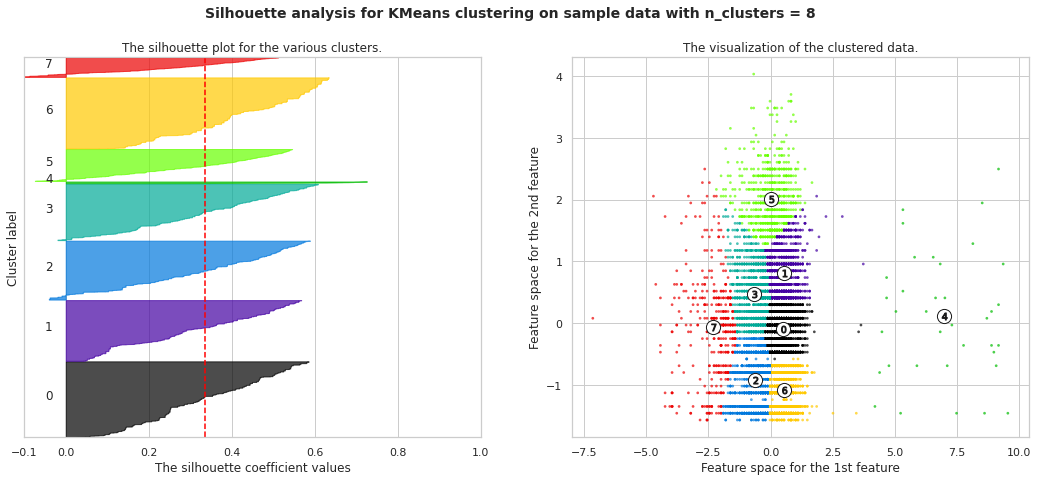

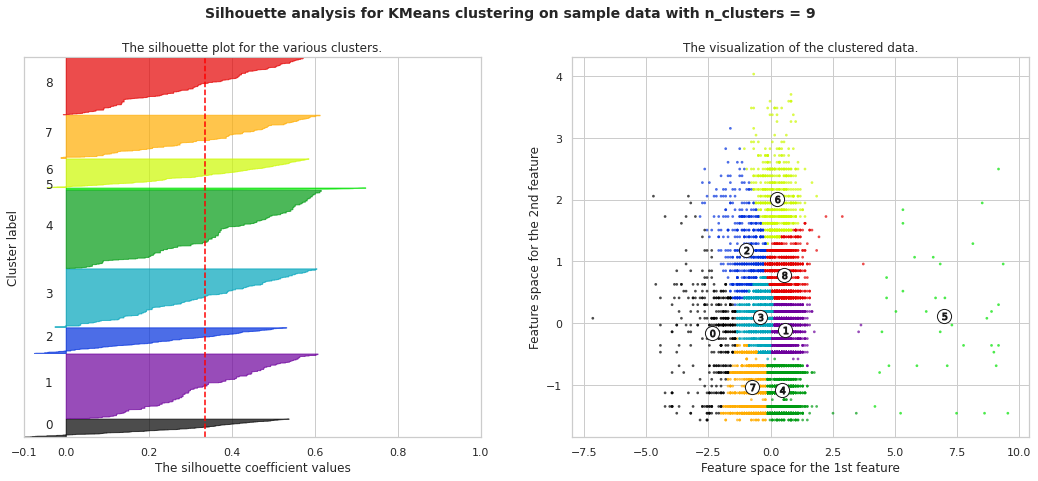

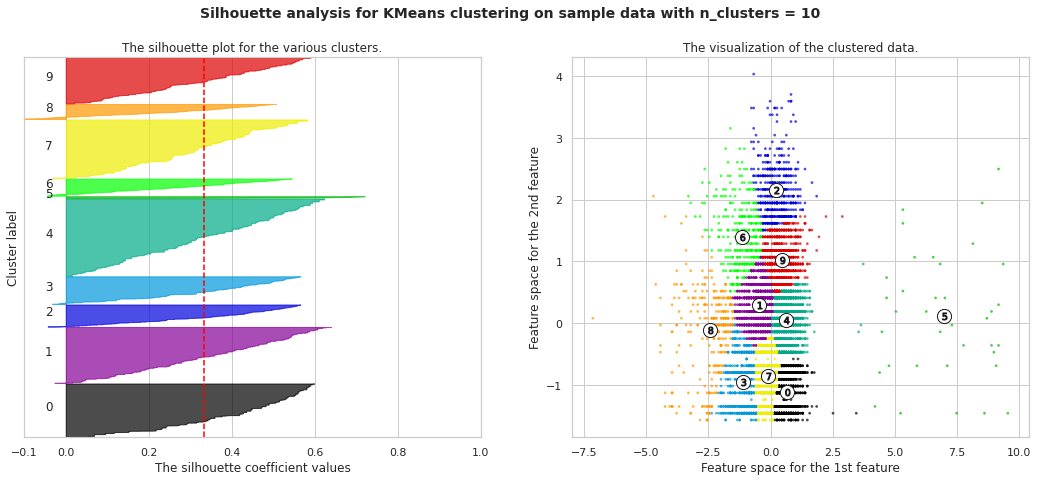

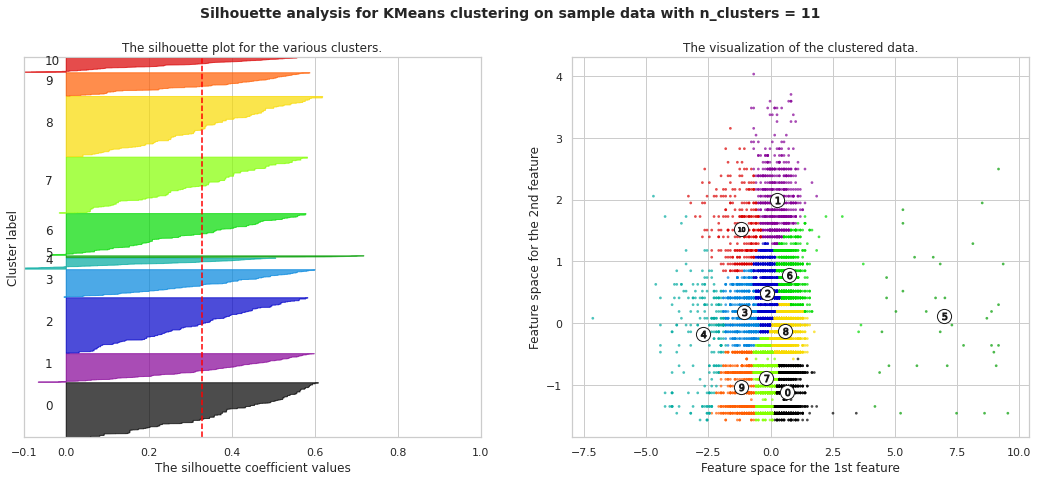

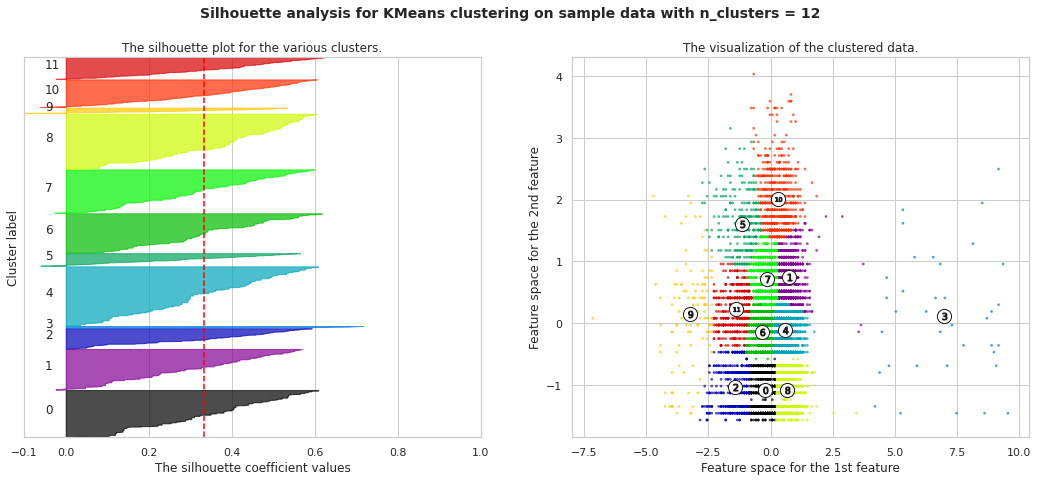

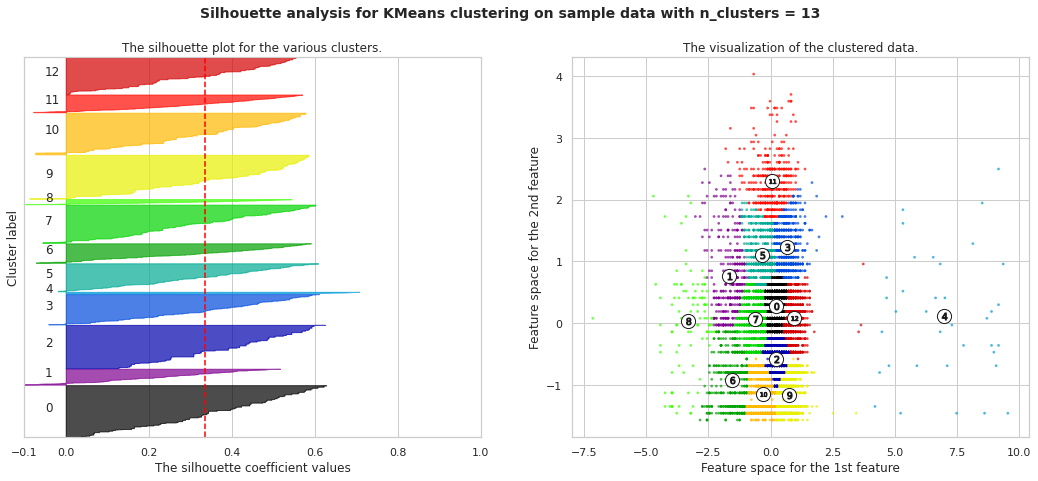

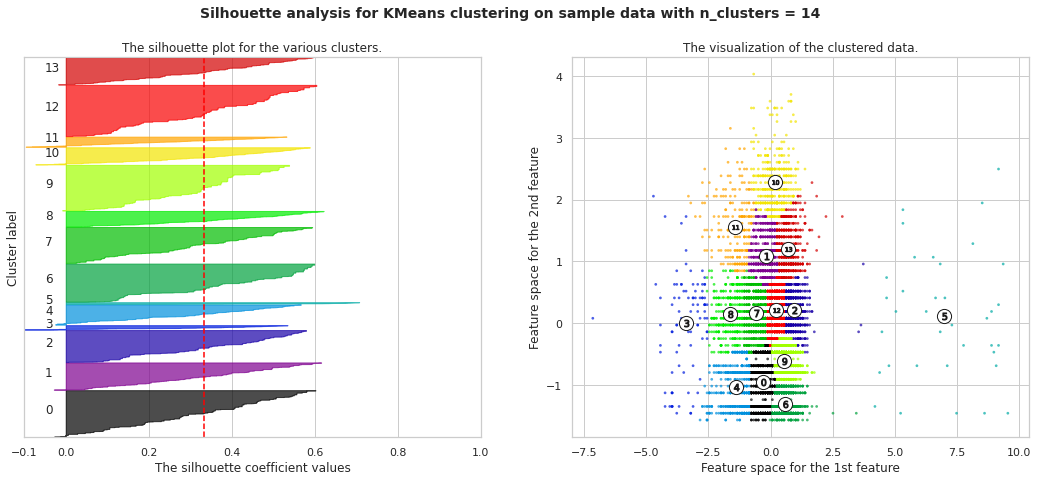

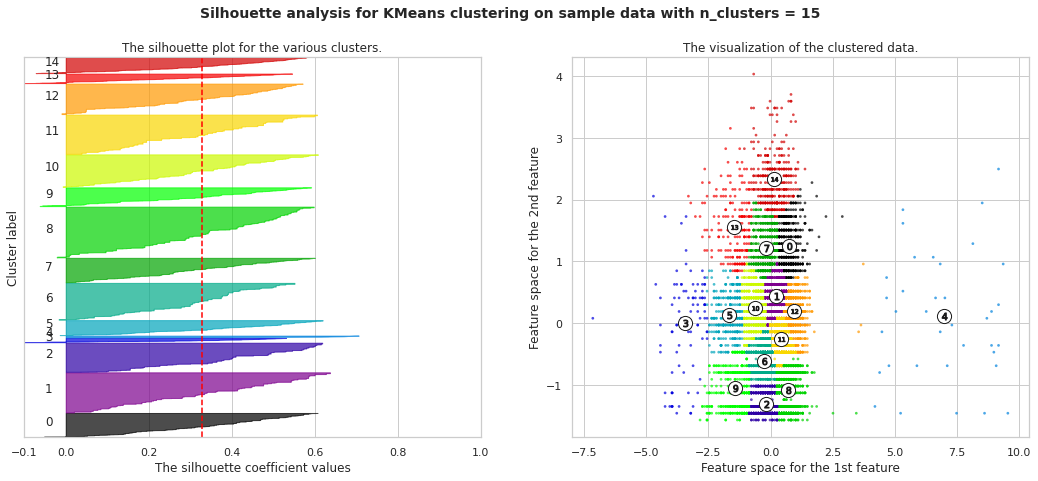

In [ ]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

Silhouette Score = (b-a)/max(a,b)

where

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

# **2. Elbow Method -Text based Clustering**

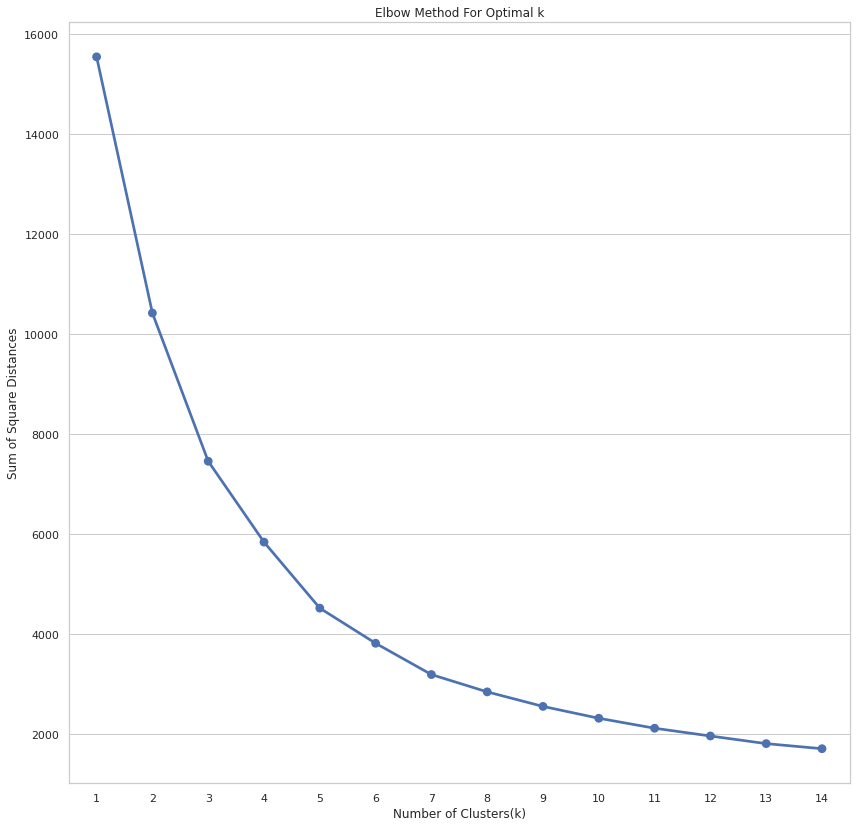

In [ ]:
sum_of_square_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_square_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_square_dist.keys()), y = list(sum_of_square_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

 We will  use 3 clusters.

In [ ]:
kmeans = KMeans(n_clusters = 3 )
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

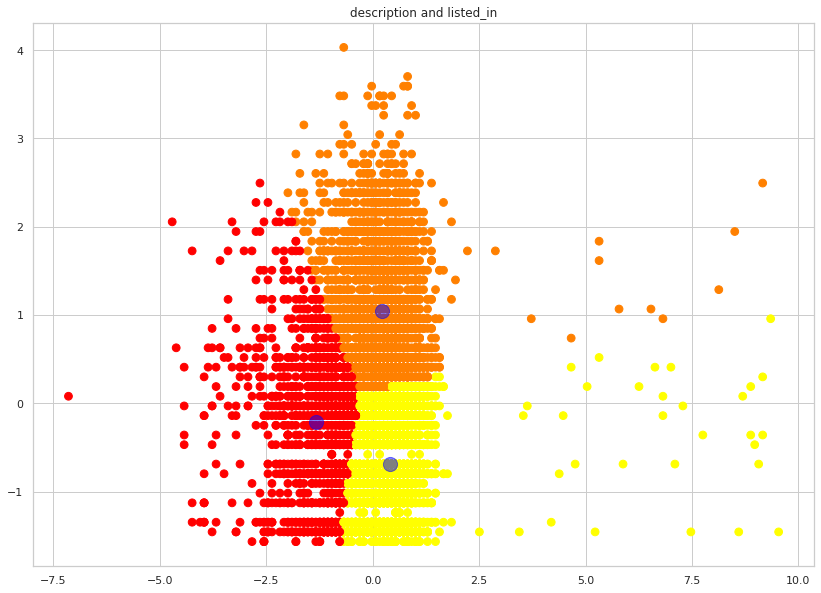

In [ ]:
plt.figure(figsize=(14,10))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=60, cmap='autumn')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

# **3. DBSCAN**

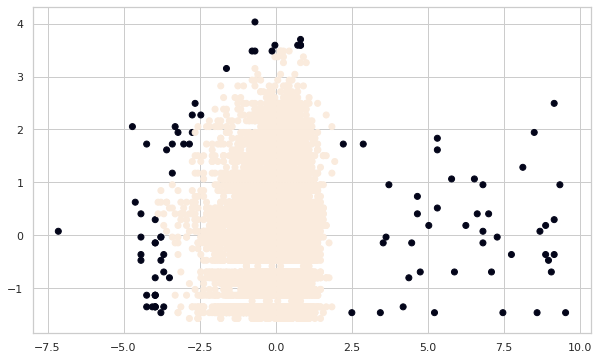

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=20).fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_pred)

# **4.Dendrogram**

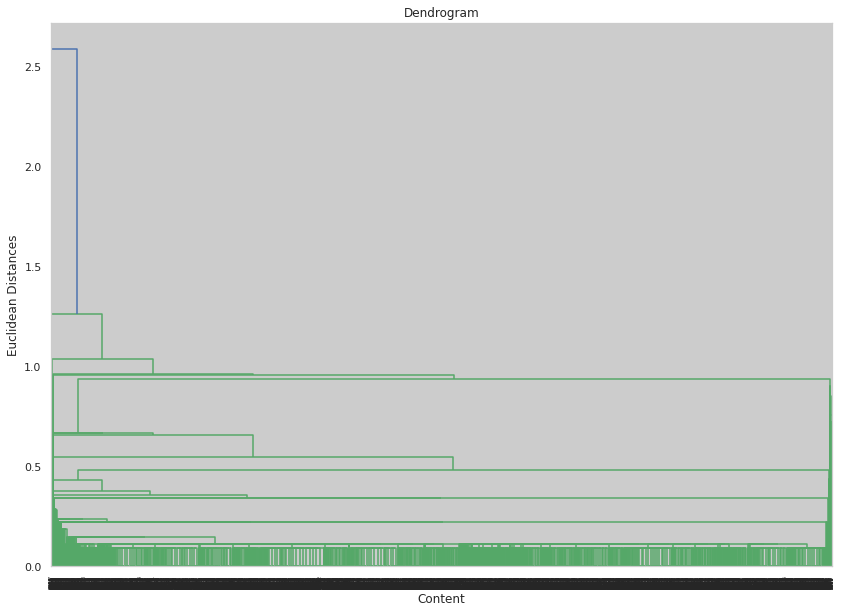

In [ ]:
 #  importing sch
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(14,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
 # find largest vertical distance we can make without crossing any other horizontal line
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()

The number of clusters will be number of vertical lines which are intersected by the line drawn using the threshold

No. of Clusters = 3.

# **5.Agglomerative Clustering**

In [ ]:
#import Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

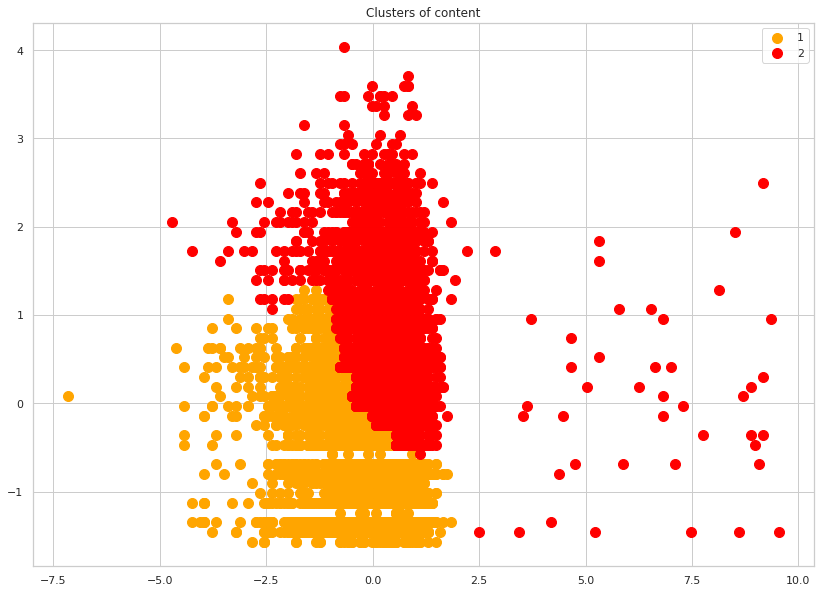

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(14,10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'orange', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'red', label = '2')


plt.title('Clusters of content')

plt.legend()
plt.show()

# **Dimensionality Reduction**

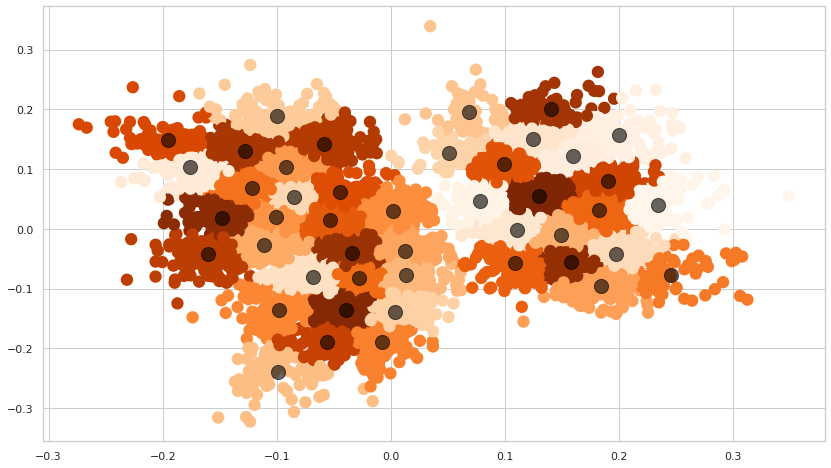

In [ ]:
#Applying PCA for dimenstionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
y = pca.fit_transform(X_vc.toarray())
kmeans = KMeans(n_clusters=k_clusters, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(y)
y_pred = kmeans.predict(y)

plt.figure(figsize=(14,8))
plt.scatter(y[:, 0], y[:, 1], c=y_pred, s=40, cmap='Oranges_r', linewidths=6)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.6);

In [ ]:
#Predicting the clusters and evaluating the silhouette score
score = silhouette_score(y, y_pred)
print("Silhouette score is {}".format(score))

Silhouette score is 0.3466308486784014


In [ ]:
#Function for getting the most common words in each cluster
def get_common_words_cluster(vc_arr, y_pred, n_feats):
    labels = np.unique(y_pred)
    dfs = []
    for label in labels:
      # indices for each cluster
      id_temp = np.where(y_pred==label)
      # returns average score across cluster
      x_means = np.mean(vc_arr[id_temp], axis = 0)
      # indices with top 20 scores
      sorted_means = np.argsort(x_means)[::-1][:n_feats]
      features = vectorizer.get_feature_names()
      common_words = [(features[i], x_means[i]) for i in sorted_means]
      df = pd.DataFrame(common_words, columns = ['words', 'count'])
      dfs.append(df)
    return dfs

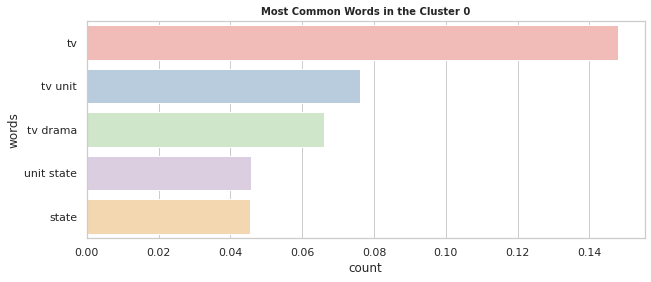

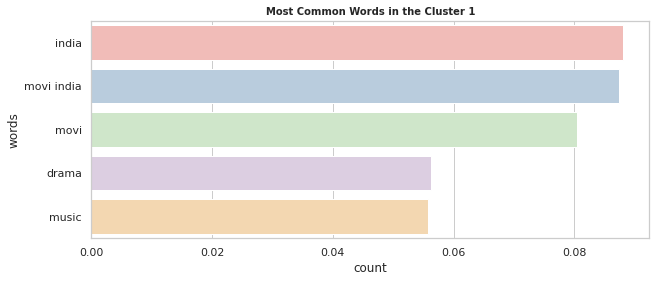

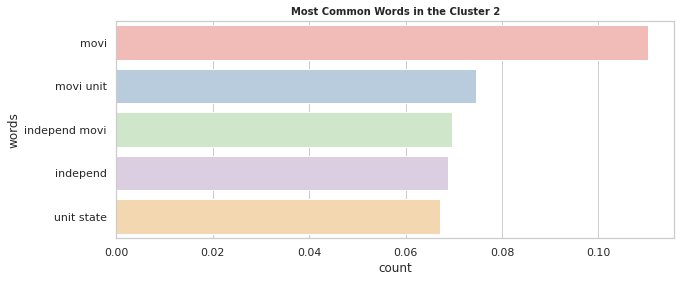

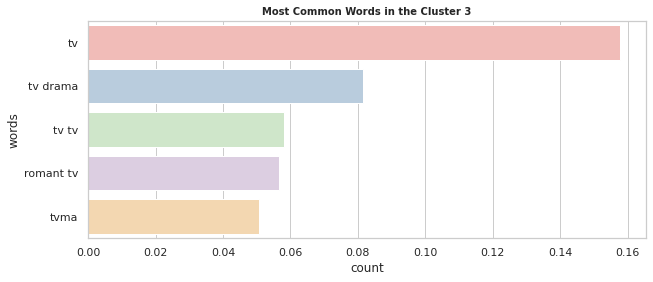

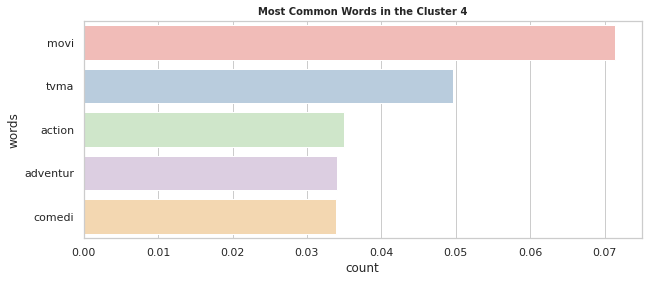

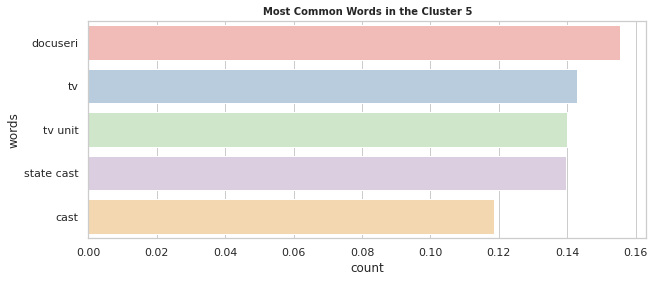

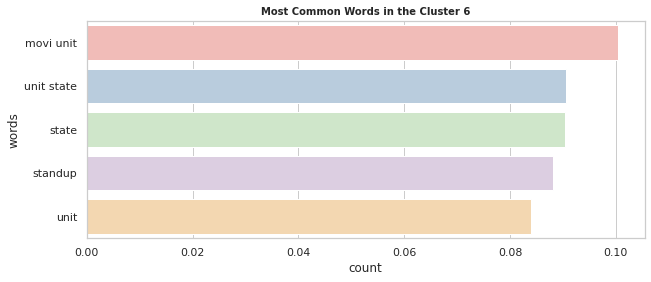

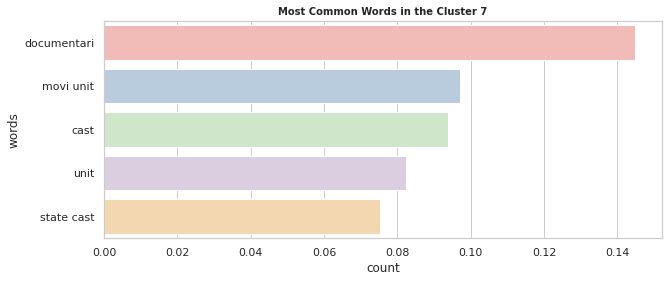

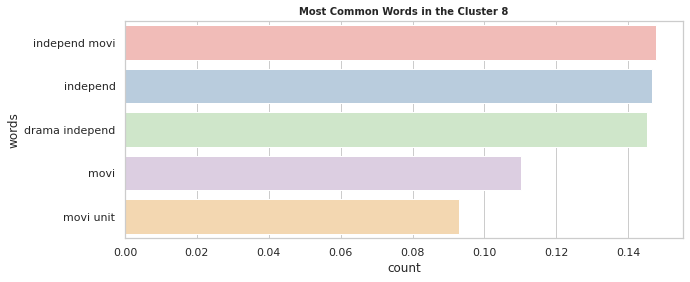

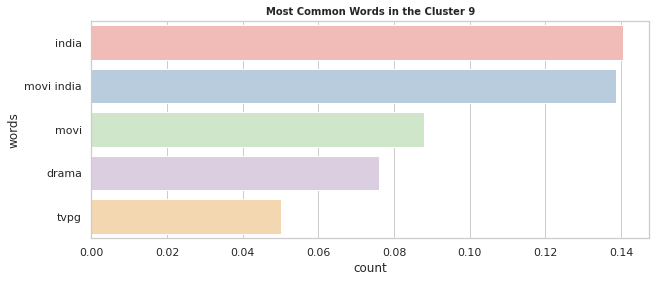

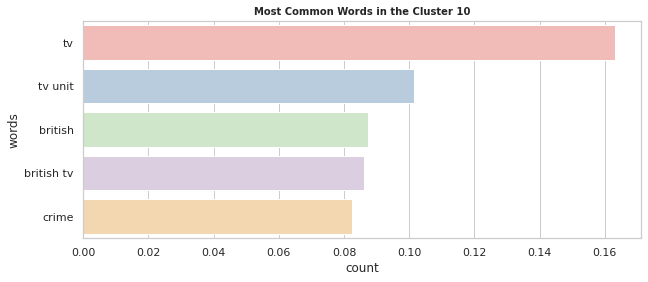

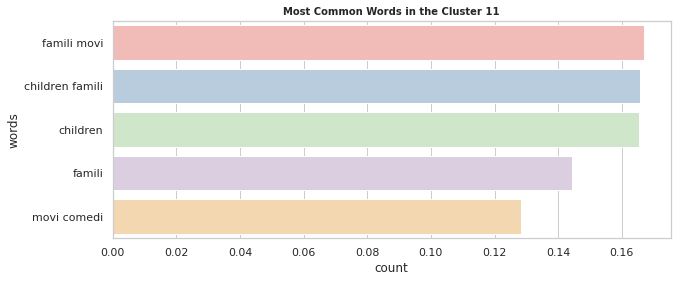

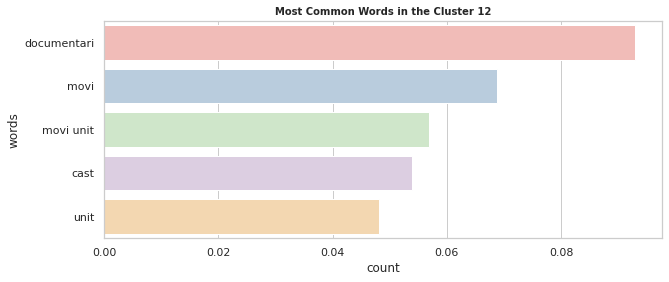

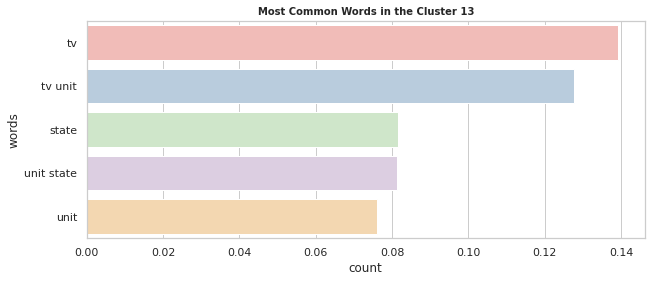

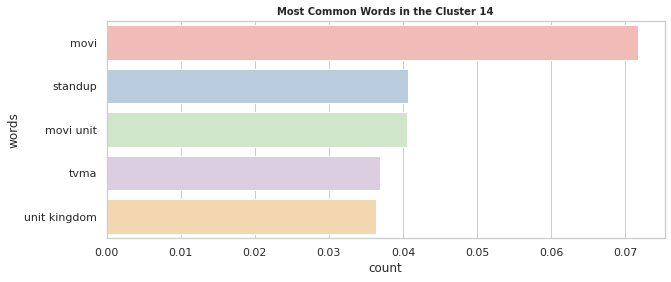

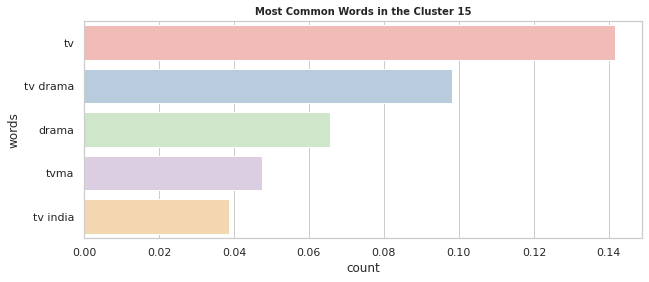

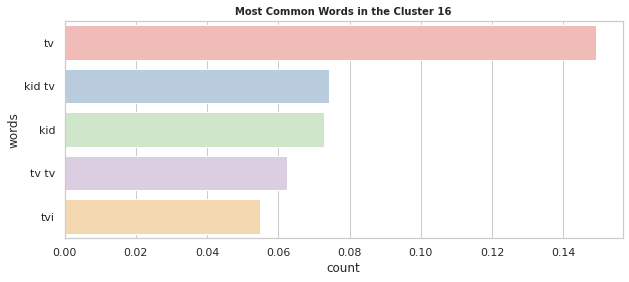

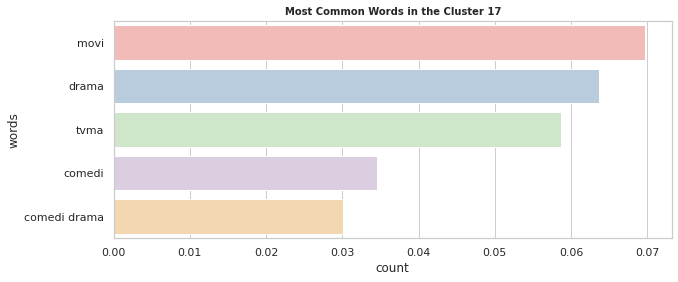

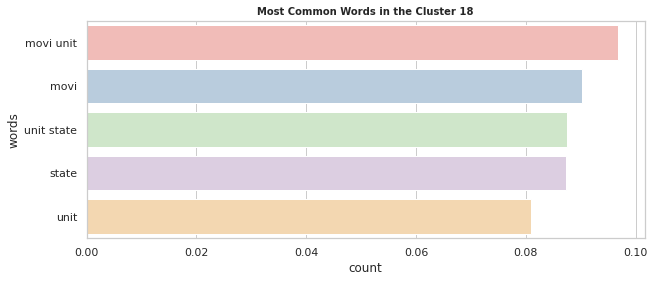

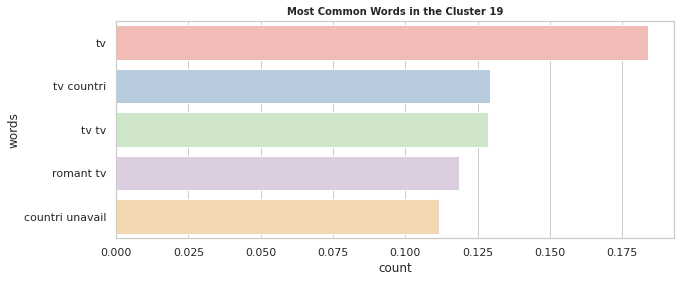

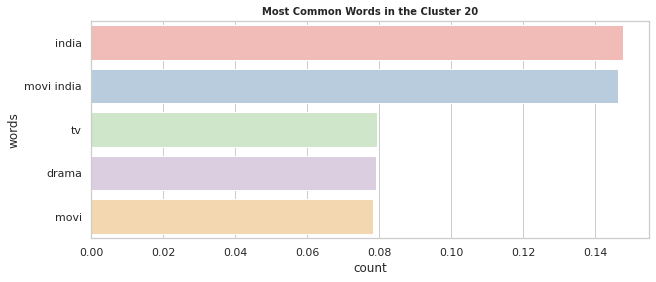

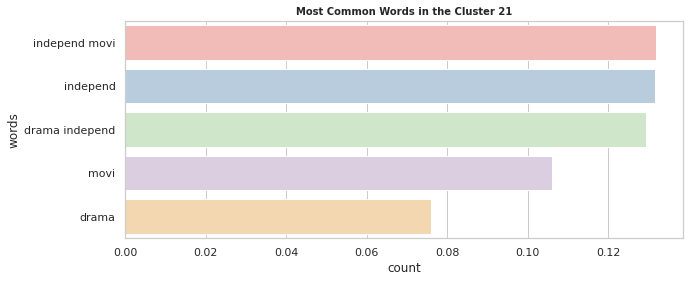

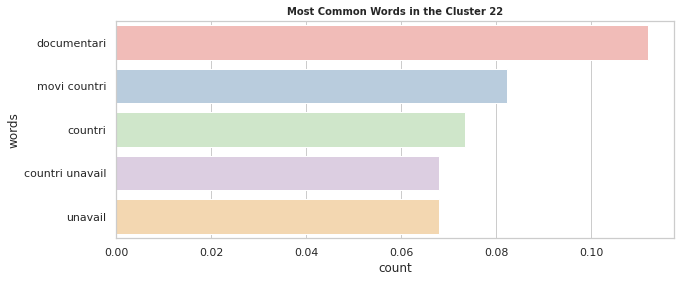

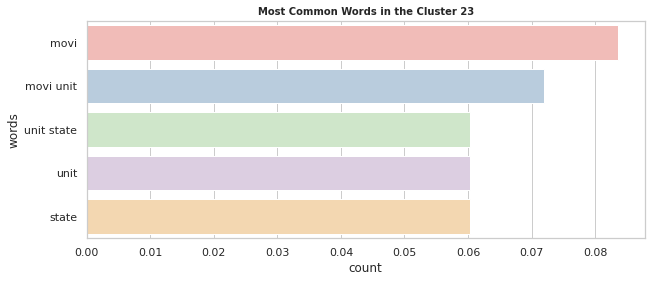

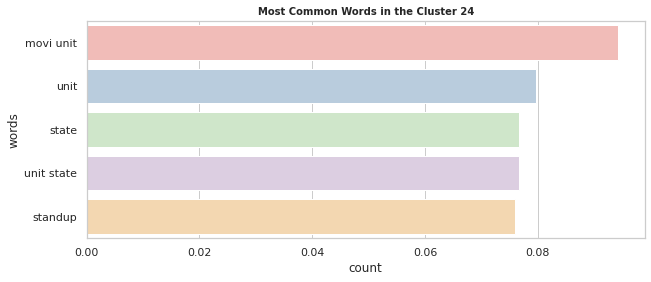

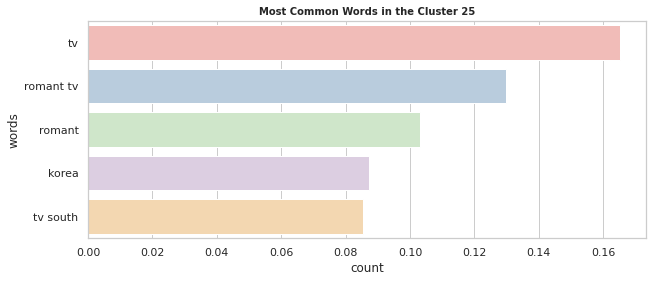

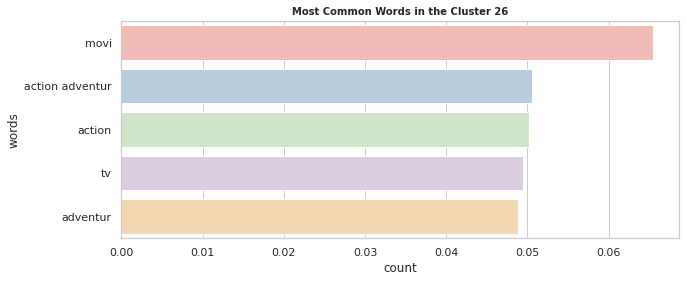

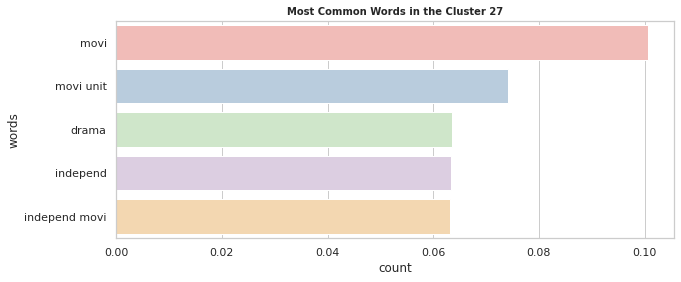

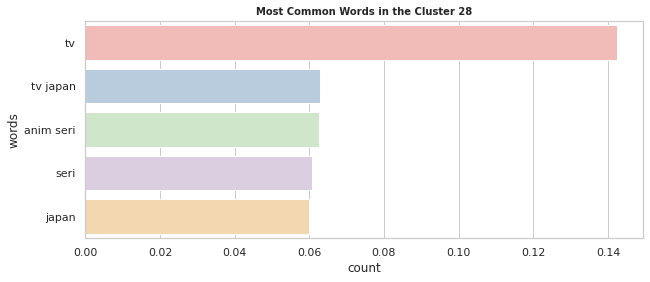

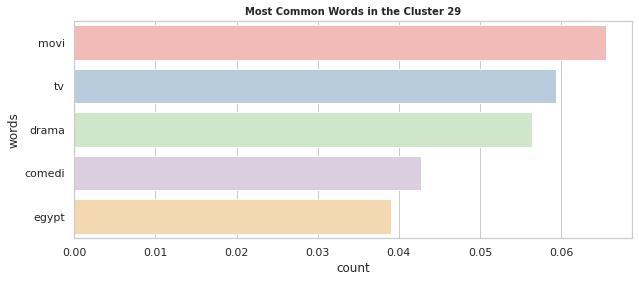

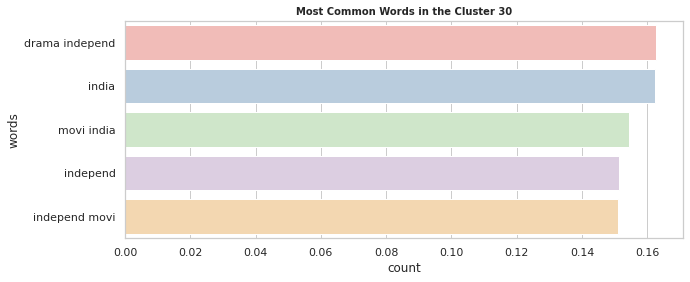

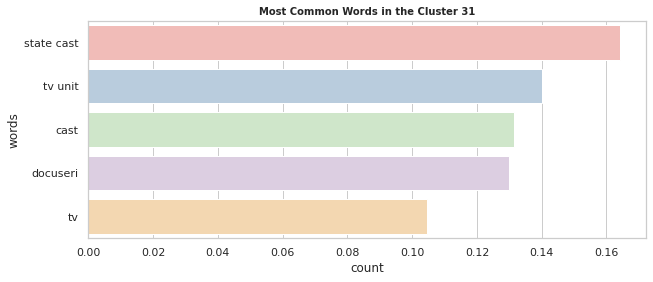

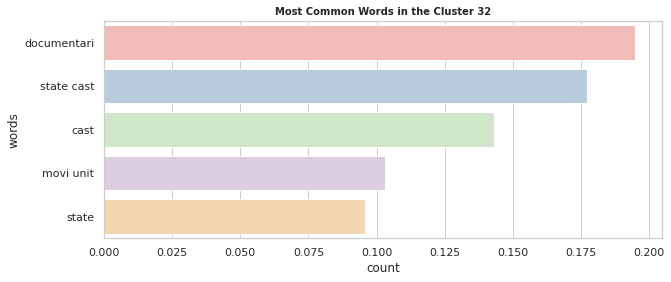

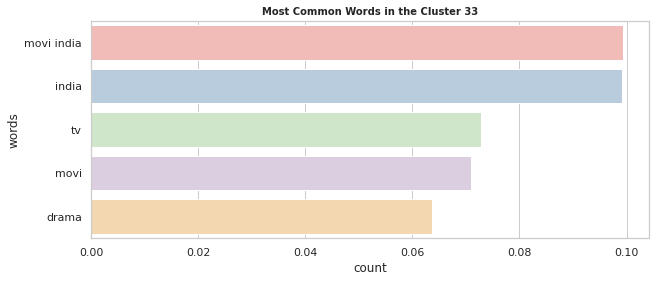

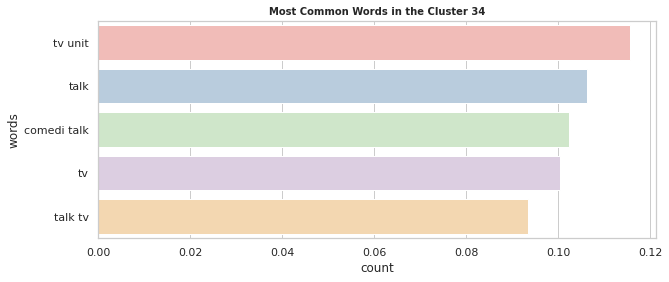

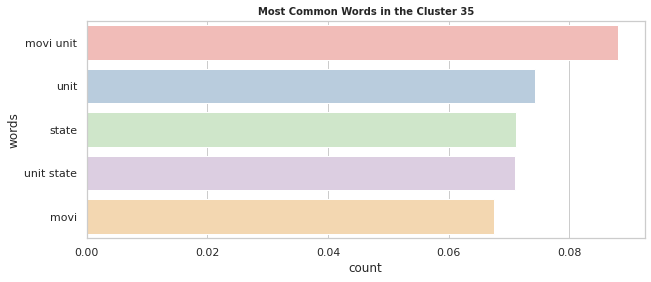

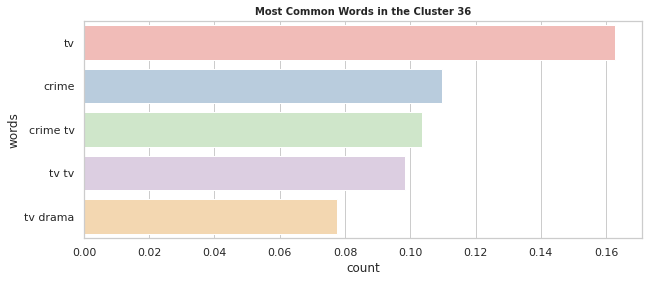

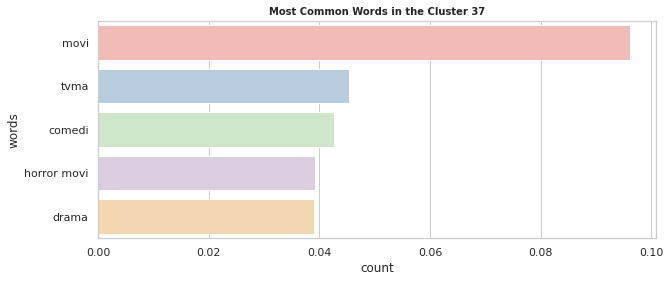

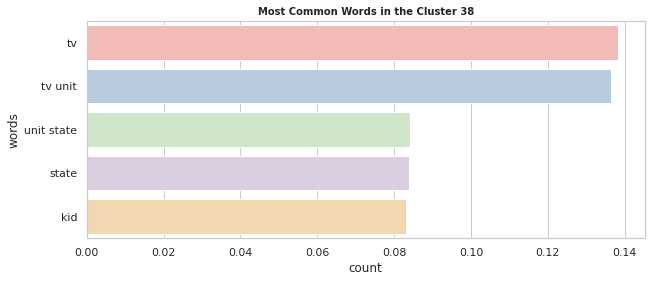

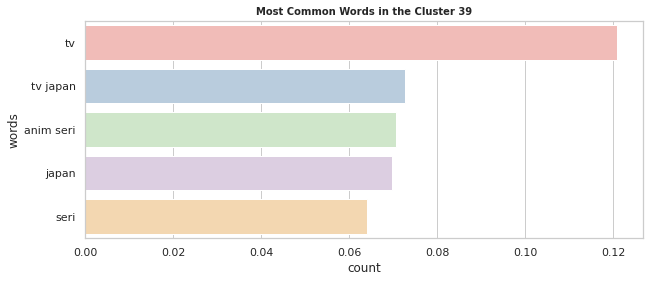

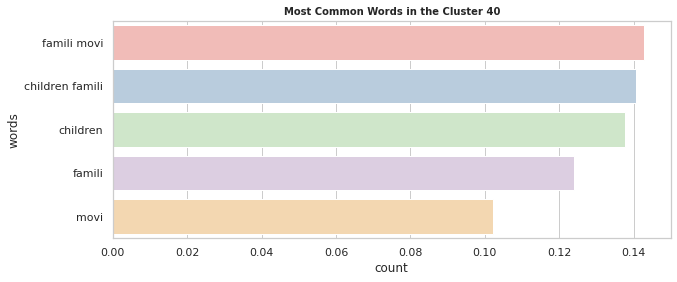

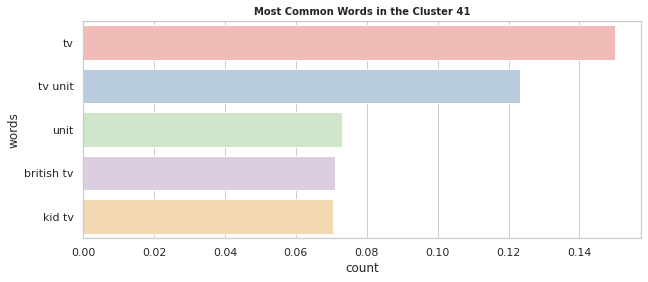

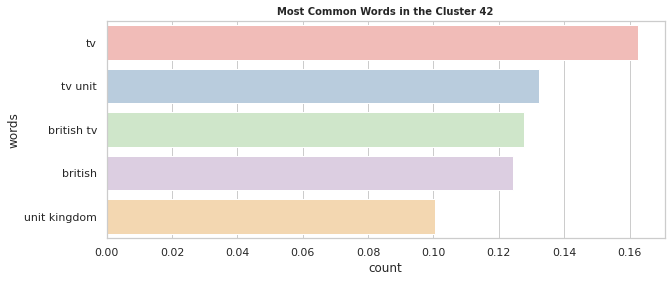

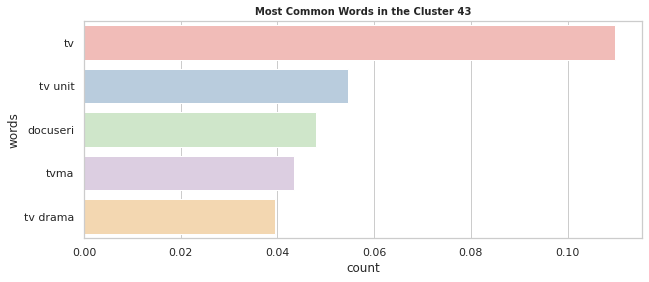

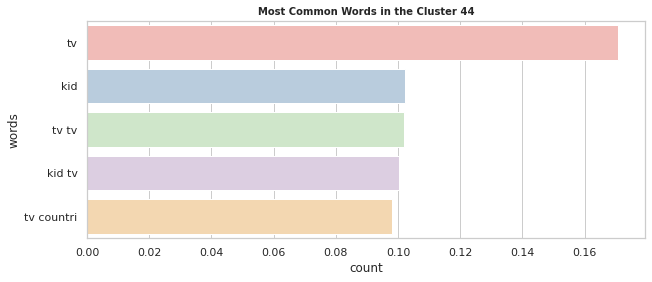

In [ ]:
#Function for data visualization of the most commin words in each cluster
def plot_common_words(dfs, num):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(10, 4))
        plt.title(("Most Common Words in the Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'count' , y = 'words', orient = 'h' , data = dfs[i][:num],palette = 'Pastel1')

dfs = get_common_words_cluster(X_vc.toarray(), y_pred, 5)
plot_common_words(dfs, 5)

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()
for i in range(k_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :k_clusters]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Cluster 0: aamir aamir khan
Cluster 1: aamir aamir khan
Cluster 2: aamir khan aamir
Cluster 3: aamir khan aamir
Cluster 4: aamir khan aamir
Cluster 5: aamir aamir khan
Cluster 6: aamir aamir khan
Cluster 7: aamir khan aamir
Cluster 8: aamir aamir khan
Cluster 9: aamir aamir khan
Cluster 10: aamir aamir khan
Cluster 11: aamir khan aamir
Cluster 12: aamir khan aamir
Cluster 13: aamir aamir khan
Cluster 14: aamir khan aamir
Cluster 15: aamir aamir khan
Cluster 16: aamir khan aamir
Cluster 17: aamir khan aamir
Cluster 18: aamir khan aamir
Cluster 19: aamir khan aamir
Cluster 20: aamir khan aamir
Cluster 21: aamir aamir khan
Cluster 22: aamir aamir khan
Cluster 23: aamir khan aamir
Cluster 24: aamir aamir khan
Cluster 25: aamir aamir khan
Cluster 26: aamir aamir khan
Cluster 27: aamir khan aamir
Cluster 28: aamir aamir khan
Cluster 29: aamir khan aamir
Cluster 30: aamir khan aamir
Cluster 31: aamir khan aamir
Cluster 32: aamir khan aamir
Cluster 33: aamir khan aamir
Cluster 34: aamir khan a

In [ ]:
nf['cluster'] = kmeans.labels_
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  ... international  \
0    August 14, 2020          2020  TV-MA  4 Seasons  ...          True   
1  December 23, 2016          2016  TV-MA     93 min  ...          True   
2  December 20, 2018          2011      R     78 min  ...          True   
3  November 16, 2017          2009  PG-13     80 min  ...         False   
4    January 1, 2020          2008  PG-13    123 min  ...         False   

  ratings_cat  Movie Release type  \
0      Adults                 New   
1      Adults                 New   
2      Adults  Early 21st century   
3       Teens  Early 21st century   
4       Teens  Early 21st century   

                                  combined_text_feat  \
0  tv drama tv scifi fantasi futur elit inhabit i...   
1  drama devast earthquak hit meico citi trap sur...   
2  horror movi armi recruit found dead fellow sol...   
3  action adventur independ movi scifi fantasi po...   
4  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new Length(description)  \
0  futur elit inhabit island paradis far crowd sl...                 125   
1  devast earthquak hit mexico citi trap survivor...                 123   
2  armi recruit found dead fellow soldier forc co...                 132   
3  postapocalypt world ragdol robot hide fear dan...                 126   
4  brilliant group student becom cardcount expert...                 126   

  Length(genres) Cluster Label cluster  
0             25             2      39  
1              5            13       4  
2             11            10       4  
3             43            34       2  
4              5            26      35  

[5 rows x 24 columns]

In [ ]:
#Function for getting the some of the same cluster item details
def find_same_cluster_items(name_nf):
  inp_nf = nf.loc[nf['title'].str.lower() == name_nf.lower()]
  num = inp_nf.cluster.iloc[0]
  type_nf = inp_nf.type.iloc[0]
  temp_df = nf.loc[(nf['cluster'] == num) & (nf['type']==type_nf)]
  temp_df = temp_df.sample(10)
  print("The cluster number is {}".format(num))
   #print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
  return list(temp_df['title'])

In [ ]:
find_same_cluster_items('zodiac')

The cluster number is 14


['Alexis Viera: A Story of Surviving',
 'The Larva Island Movie',
 'David Foster: Off the Record',
 'Fary Is the New Black',
 'Pokémon: Mewtwo Strikes Back - Evolution',
 'Carlos Ballarta: Furia Ñera',
 'Free Rein: The Twelve Neighs of Christmas',
 'Outlawed',
 'First Impression',
 'Long Time Running']

In [ ]:
find_same_cluster_items('Dear Zindagi')

The cluster number is 20


['Oththa Seruppu Size 7',
 'Red Oleanders Raktokarobi',
 'Anaamika',
 'Oh Darling Yeh Hai India',
 'Dorasaani',
 'Boss',
 'Viswasapoorvam Mansoor',
 'Malaal',
 'Hasee Toh Phasee',
 'Love Like the Falling Rain']

# **RECOMMENDATION**

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

#compute the cosine similarity matrix
cosine_sim= linear_kernel(X_vc,X_vc)

In [ ]:
#Series for getting the index and title
indices = pd.Series(nf.index,index=nf['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim = cosine_sim):

    #get index of the matching title
    idx=indices[title]

    #get the similarity score of the similar titles
    sim_scores=list(enumerate(cosine_sim[idx]))

    #sort the movies based on the similarity score
    sim_scores=sorted(sim_scores, key=lambda x:x[1], reverse=True)

    #get the similarity score of top 10 movies
    sim_scores=sim_scores[1:11]

    #get the indices
    movie_indices = [i[0] for i in sim_scores]

    #return the top indices
    return nf['title'].iloc[movie_indices]

In [ ]:
get_recommendations('Dear Zindagi')

5197                Ricardo Quevedo: Hay gente así
497                      An Unremarkable Christmas
3795                              Loving is Losing
5595    Si saben cómo me pongo ¿pá qué me invitan?
4853                                   Pickpockets
4818                                  Penalty Kick
5386                                  Santo Cachón
2147                              Feo pero sabroso
375          Alejandro Riaño: Especial de stand up
1740                            Dhoondte Reh Jaoge
Name: title, dtype: object

# **Conclusion**
1.The dataset contains 7787 rows and 12 columns, cast and director columns have a lot of missing values so we dropped them and we have 10 features for the further analysis.

2.We have two types of content movies and TV shows.

3.Netflix has 69% of its content as movies, so we can say that movies are clearly more popular on Netflix than TV shows.

4.For mature audience, there is much more movie content than TV shows. However, for the younger audience (under the age of 17),there are more TV shows than movies.

5.Netflix has started adding content since 2014,highest number of movies and tv shows added in the year 2019,there is consistent content addition to netflix across the year.

6.The average duration of a movie on netflix is 90 minutes.

7.With respect to available content,the United States is on the top.India is at second followed by the UK and Canada. China is not even close to the top.

8.In terms of genres, Dramas is on the top followed by Comedies and Documentaries.

9.Number of movies added to netflix is higher than that of TV shows. In 2019, netflix added 1497 movies and 656 TV shows. So there we cannot conclude that netflix has switched focus from movies to TV shows.

10.Principal component analysis was performed inorder to reduce the higher dimensionality which improved the silhouette coefficient to 0.34118.

11.Clusters are identified for each of the record in the dataset.

12.Recommendation based on cosine similiarity is done.